<a href="https://colab.research.google.com/github/sc7-cloud/TFG---GOOGLE-COLAB-C-DIGOS-/blob/main/ANALISIS_DE_LAS_VARIABLES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from google.colab import files


uploaded = files.upload()


df_filename = list(uploaded.keys())[0]


df = pd.read_excel(df_filename, sheet_name="ARTISTAS")


df.drop(columns=["Me gusta en TikTok"], inplace=True, errors='ignore')


def calculate_tiktok_engagement(df):
    """Calcula la tasa de participación en TikTok como (interacciones / vistas) * 100 para todos los valores."""
    df["Tasa de Participación en TikTok"] = (
        (df["Publicaciones de TikTok"] / df["Vistas en TikTok"]) * 100
    )
    return df

df = calculate_tiktok_engagement(df)


knn_imputer = KNNImputer(n_neighbors=5)
spotify_columns = [
    "Seguidores en Spotify", "Oyentes mensuales en Spotify", "Popularidad en Spotify",
    "Alcance de playlists en Spotify", "Conteo de las playlists en Spotify"
]
df[spotify_columns] = knn_imputer.fit_transform(df[spotify_columns])


df["Tasa de conversión en Spotify"] = df["Oyentes mensuales en Spotify"] / df["Seguidores en Spotify"]


def fill_categorical_mode(df, column):
    """Rellena valores nulos en columnas categóricas con el valor más frecuente o 'Desconocido'."""
    mode_value = df[column].mode()
    fill_value = mode_value[0] if not mode_value.empty else "Desconocido"
    df[column] = df[column].fillna(fill_value)
    return df

categorical_columns = ["Artista", "Región", "Continente", "Solista/Grupo", "Género 2"]
for col in categorical_columns:
    df = fill_categorical_mode(df, col)


df.dropna(inplace=True)


if df.isnull().sum().sum() == 0:
    print("✅ Todos los valores nulos han sido eliminados correctamente.")
else:
    print("⚠️ Aún quedan valores nulos en algunas columnas, revisa el archivo antes de usarlo.")


df_cleaned_filename = "ARTISTAS_LIMPIO.xlsx"
df.to_excel(df_cleaned_filename, index=False)


files.download(df_cleaned_filename)

print("Valores nulos eliminados. Archivo descargable generado.")




Saving ARTISTAS (4).xlsx to ARTISTAS (4).xlsx
✅ Todos los valores nulos han sido eliminados correctamente.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Valores nulos eliminados. Archivo descargable generado.


Saving ARTISTAS_LIMPIO (1).xlsx to ARTISTAS_LIMPIO (1) (1).xlsx

📊 Medidas de tendencia central y dispersión
       Chartmetric ID  Tasa de Participación en TikTok  \
count    6.443000e+03                      6443.000000   
mean     1.931128e+06                         0.961958   
std      2.851291e+06                        28.747832   
min      4.000000e+00                         0.000000   
25%      1.483345e+05                         0.024273   
50%      5.661200e+05                         0.049262   
75%      3.390716e+06                         0.099455   
max      1.305551e+07                      1666.077739   

       Publicaciones de TikTok  Vistas en TikTok  Seguidores en Spotify  \
count             6.443000e+03      6.443000e+03           6.443000e+03   
mean              8.813626e+05      1.516846e+09           1.694521e+06   
std               3.018586e+06      5.466556e+09           5.697762e+06   
min               0.000000e+00      3.200000e+01           4.000000e

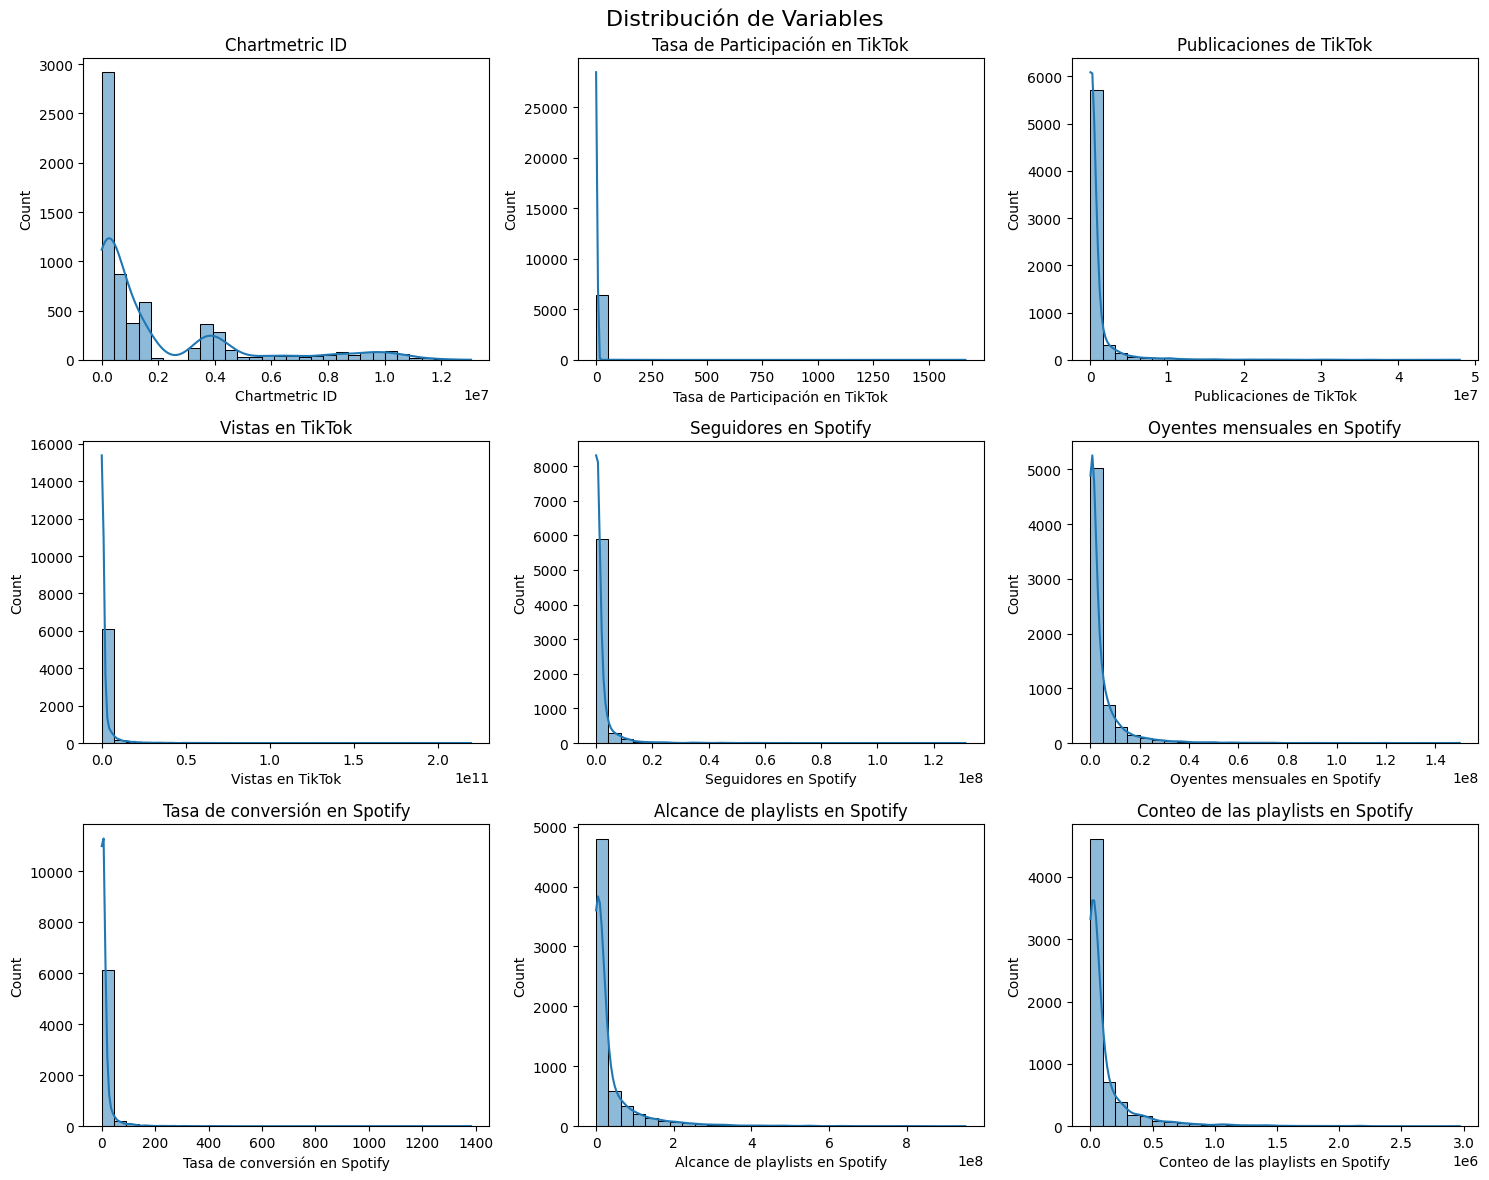


🔍 Outliers en Chartmetric ID: 483 filas identificadas

🔍 Outliers en Tasa de Participación en TikTok: 602 filas identificadas

🔍 Outliers en Publicaciones de TikTok: 970 filas identificadas

🔍 Outliers en Vistas en TikTok: 958 filas identificadas

🔍 Outliers en Seguidores en Spotify: 837 filas identificadas

🔍 Outliers en Oyentes mensuales en Spotify: 700 filas identificadas

🔍 Outliers en Tasa de conversión en Spotify: 767 filas identificadas

🔍 Outliers en Alcance de playlists en Spotify: 853 filas identificadas

🔍 Outliers en Conteo de las playlists en Spotify: 785 filas identificadas
✅ Análisis completado


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files


uploaded = files.upload()
df_filename = list(uploaded.keys())[0]


df = pd.read_excel(df_filename)


def estadisticas_descriptivas(df):
    print("\n📊 Medidas de tendencia central y dispersión")
    print(df.describe())

    print("\n📈 Frecuencia de valores categóricos")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\nFrecuencia de {col}:")
        print(df[col].value_counts())

estadisticas_descriptivas(df)


def graficos_descriptivos(df, numeric_cols):
    num_cols = len(numeric_cols)
    rows = (num_cols // 3) + (num_cols % 3 > 0)
    cols = min(3, num_cols)

    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(col)
    plt.suptitle("Distribución de Variables", fontsize=16)
    plt.tight_layout()
    plt.show()

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
graficos_descriptivos(df, numeric_columns)


def identificar_outliers(df, numeric_cols):
    outliers = {}
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        filtro = (df[col] < (Q1 - 1.5 * IQR)) | (df[col] > (Q3 + 1.5 * IQR))
        outliers[col] = df[filtro]
        print(f"\n🔍 Outliers en {col}: {outliers[col].shape[0]} filas identificadas")
    return outliers

outliers_detectados = identificar_outliers(df, numeric_columns)

print("✅ Análisis completado")


Saving ARTISTAS_LIMPIO (1).xlsx to ARTISTAS_LIMPIO (1) (2).xlsx

📊 Medidas de tendencia central y dispersión
       Chartmetric ID  Tasa de Participación en TikTok  \
count    6.443000e+03                      6443.000000   
mean     1.931128e+06                         0.961958   
std      2.851291e+06                        28.747832   
min      4.000000e+00                         0.000000   
25%      1.483345e+05                         0.024273   
50%      5.661200e+05                         0.049262   
75%      3.390716e+06                         0.099455   
max      1.305551e+07                      1666.077739   

       Publicaciones de TikTok  Vistas en TikTok  Seguidores en Spotify  \
count             6.443000e+03      6.443000e+03           6.443000e+03   
mean              8.813626e+05      1.516846e+09           1.694521e+06   
std               3.018586e+06      5.466556e+09           5.697762e+06   
min               0.000000e+00      3.200000e+01           4.000000e

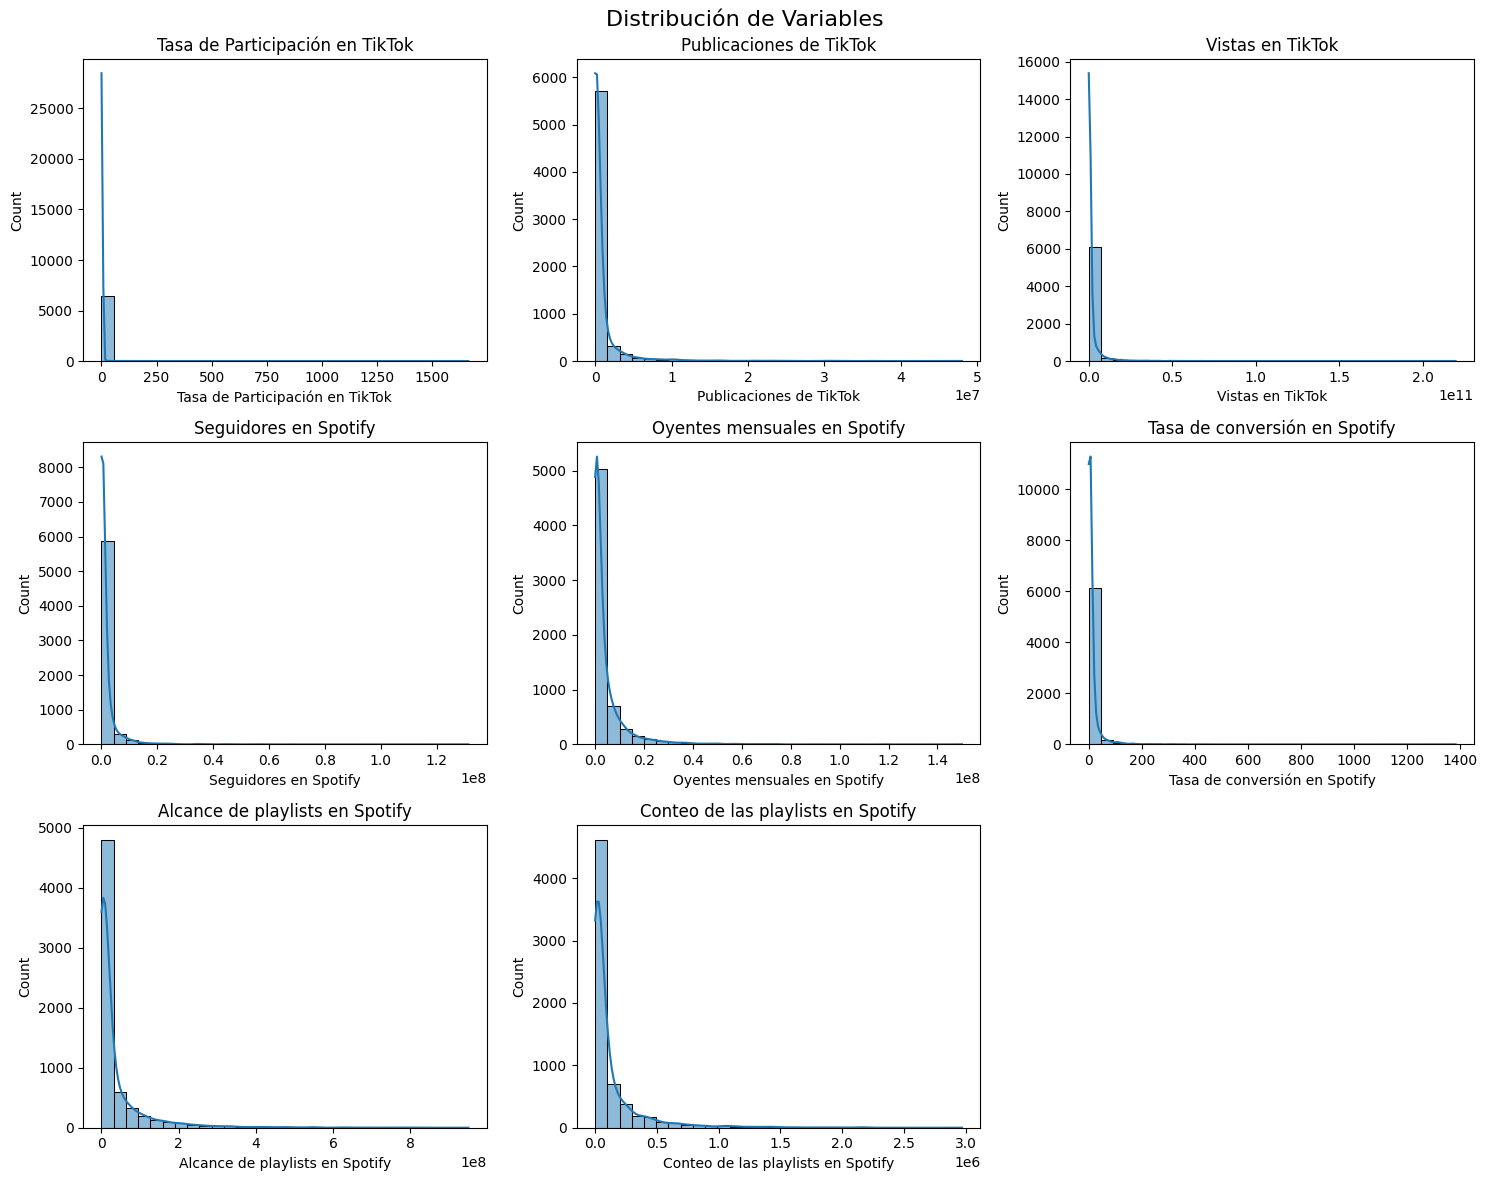

✅ Outliers eliminados y datos actualizados


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

📂 Archivo sin outliers descargable generado


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files


uploaded = files.upload()
df_filename = list(uploaded.keys())[0]


df = pd.read_excel(df_filename)


def estadisticas_descriptivas(df):
    print("\n📊 Medidas de tendencia central y dispersión")
    print(df.describe())

    print("\n📈 Frecuencia de valores categóricos")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\nFrecuencia de {col}:")
        print(df[col].value_counts())

estadisticas_descriptivas(df)


def graficos_descriptivos(df, numeric_cols):
    num_cols = len(numeric_cols)
    rows = (num_cols // 3) + (num_cols % 3 > 0)
    cols = min(3, num_cols)

    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(col)
    plt.suptitle("Distribución de Variables", fontsize=16)
    plt.tight_layout()
    plt.show()

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Chartmetric ID' in numeric_columns:
    numeric_columns.remove('Chartmetric ID')
graficos_descriptivos(df, numeric_columns)


def eliminar_outliers(df, numeric_cols):
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        filtro = (df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))
        df = df[filtro]
    return df

df = eliminar_outliers(df, numeric_columns)
print("✅ Outliers eliminados y datos actualizados")


df_cleaned_filename = "ARTISTAS_SIN_OUTLIERS.xlsx"
df.to_excel(df_cleaned_filename, index=False)
files.download(df_cleaned_filename)

print("📂 Archivo sin outliers descargable generado")


Saving ARTISTAS_SIN_OUTLIERS (1).xlsx to ARTISTAS_SIN_OUTLIERS (1).xlsx

📊 Medidas de tendencia central y dispersión
       Chartmetric ID  Tasa de Participación en TikTok  \
count    2.679000e+03                      2679.000000   
mean     2.419078e+06                         0.055339   
std      2.933715e+06                         0.050473   
min      2.990000e+02                         0.000000   
25%      3.052940e+05                         0.016225   
50%      1.010285e+06                         0.037180   
75%      3.767280e+06                         0.079418   
max      1.211487e+07                         0.212207   

       Publicaciones de TikTok  Vistas en TikTok  Seguidores en Spotify  \
count             2.679000e+03      2.679000e+03           2.679000e+03   
mean              4.610459e+04      9.067025e+07           1.757969e+05   
std               1.081393e+05      1.625944e+08           2.517897e+05   
min               0.000000e+00      3.870000e+02           2

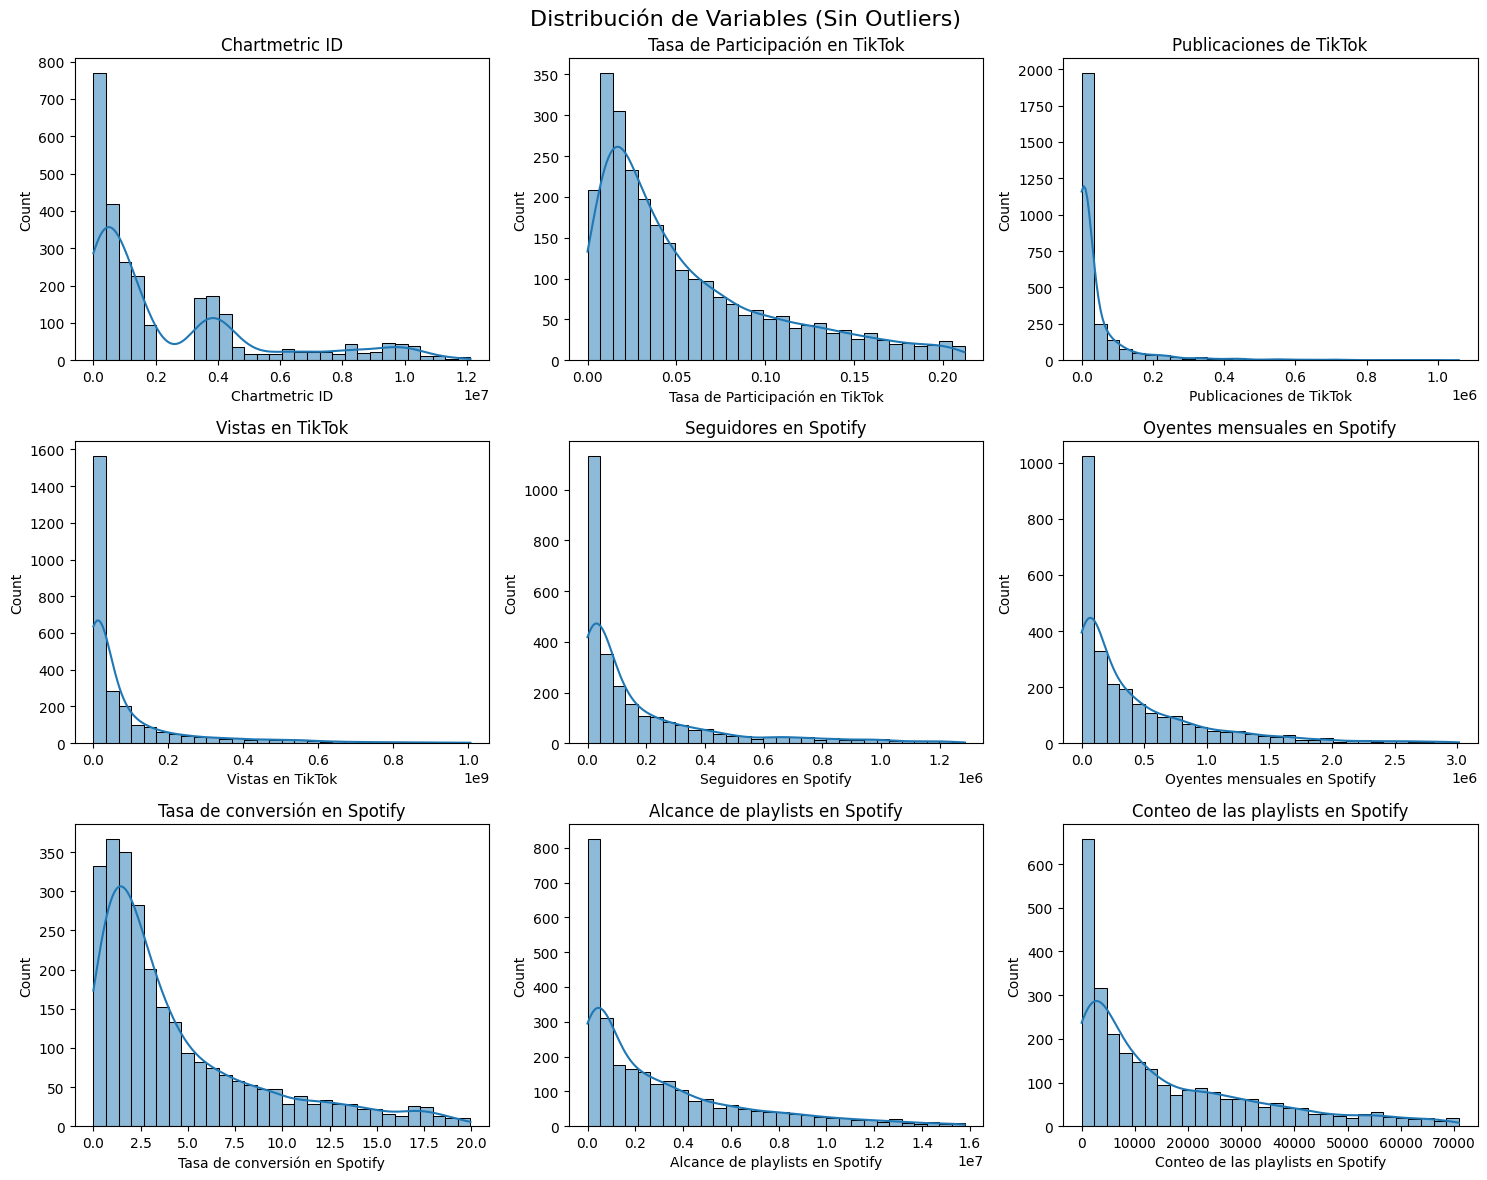

✅ Análisis sin outliers completado


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files


uploaded = files.upload()
df_filename = list(uploaded.keys())[0]


df = pd.read_excel(df_filename)


def estadisticas_descriptivas(df):
    print("\n📊 Medidas de tendencia central y dispersión")
    print(df.describe())

    print("\n📈 Frecuencia de valores categóricos")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\nFrecuencia de {col}:")
        print(df[col].value_counts())

estadisticas_descriptivas(df)


def graficos_descriptivos(df, numeric_cols):
    num_cols = len(numeric_cols)
    rows = (num_cols // 3) + (num_cols % 3 > 0)
    cols = min(3, num_cols)

    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(col)
    plt.suptitle("Distribución de Variables (Sin Outliers)", fontsize=16)
    plt.tight_layout()
    plt.show()

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
graficos_descriptivos(df, numeric_columns)

print("✅ Análisis sin outliers completado")


Saving ARTISTAS_SIN_OUTLIERS (1).xlsx to ARTISTAS_SIN_OUTLIERS (1) (1).xlsx

📊 Medidas de tendencia central y dispersión
       Chartmetric ID  Tasa de Participación en TikTok  \
count    2.679000e+03                      2679.000000   
mean     2.419078e+06                         0.055339   
std      2.933715e+06                         0.050473   
min      2.990000e+02                         0.000000   
25%      3.052940e+05                         0.016225   
50%      1.010285e+06                         0.037180   
75%      3.767280e+06                         0.079418   
max      1.211487e+07                         0.212207   

       Publicaciones de TikTok  Vistas en TikTok  Seguidores en Spotify  \
count             2.679000e+03      2.679000e+03           2.679000e+03   
mean              4.610459e+04      9.067025e+07           1.757969e+05   
std               1.081393e+05      1.625944e+08           2.517897e+05   
min               0.000000e+00      3.870000e+02        

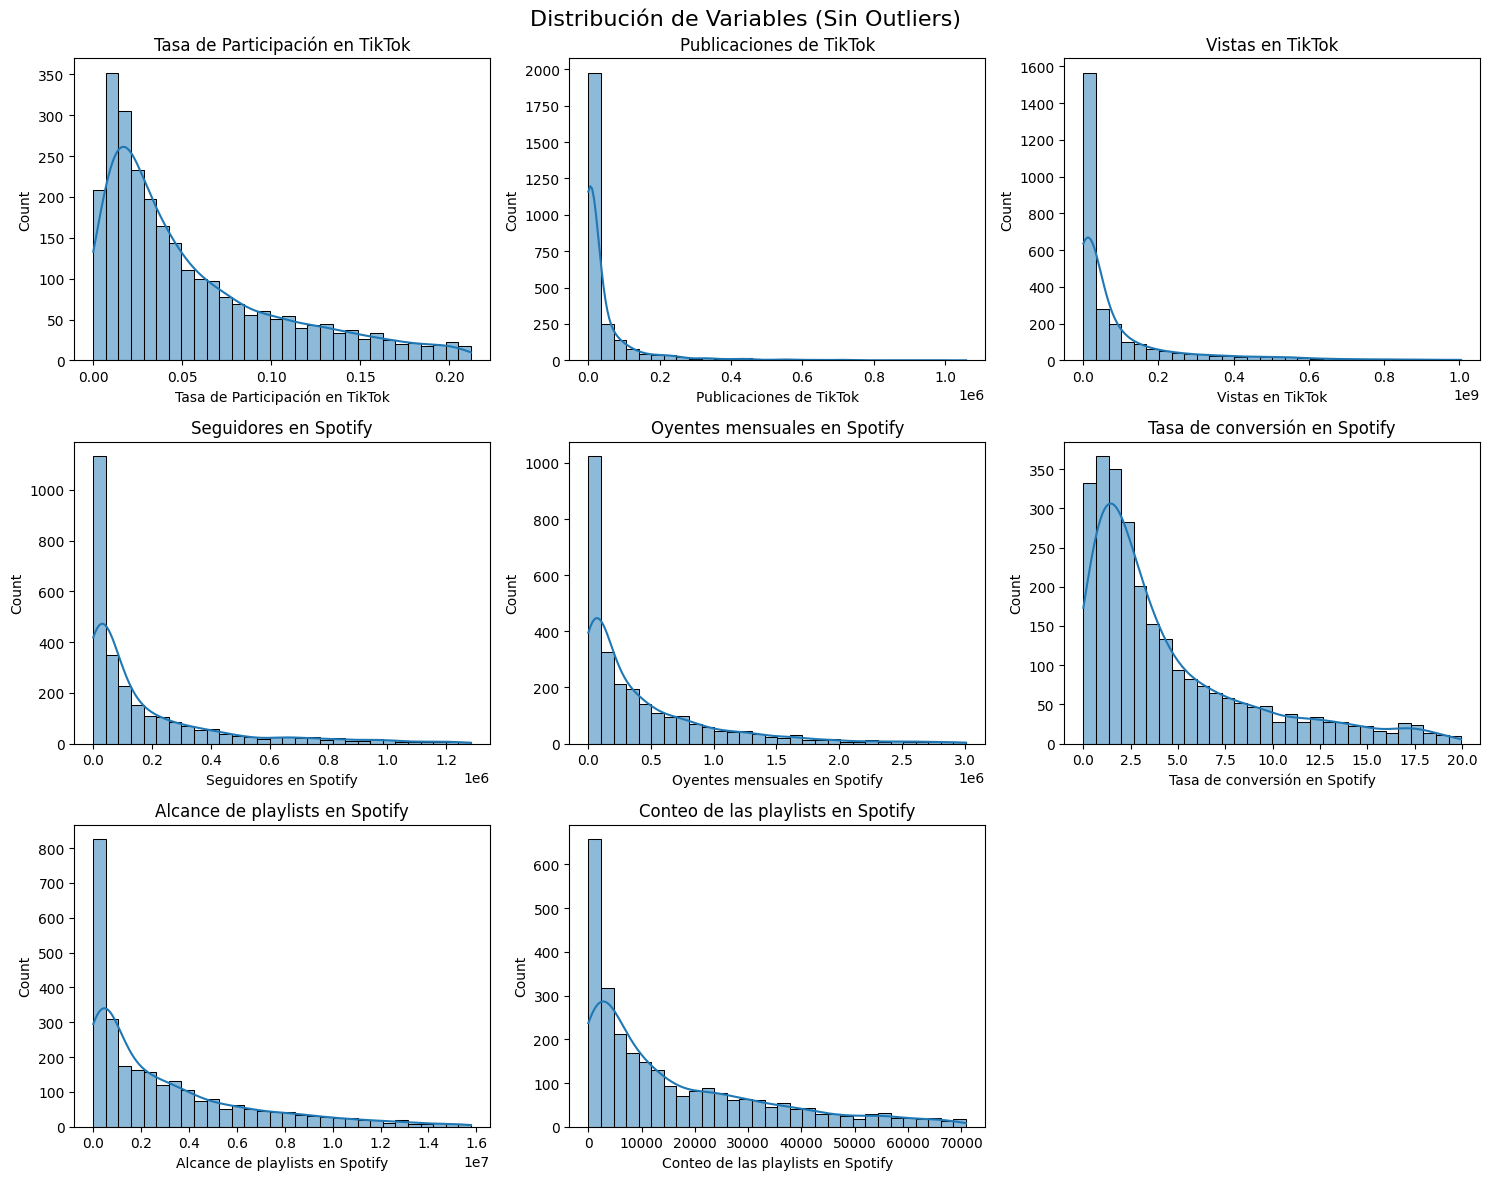

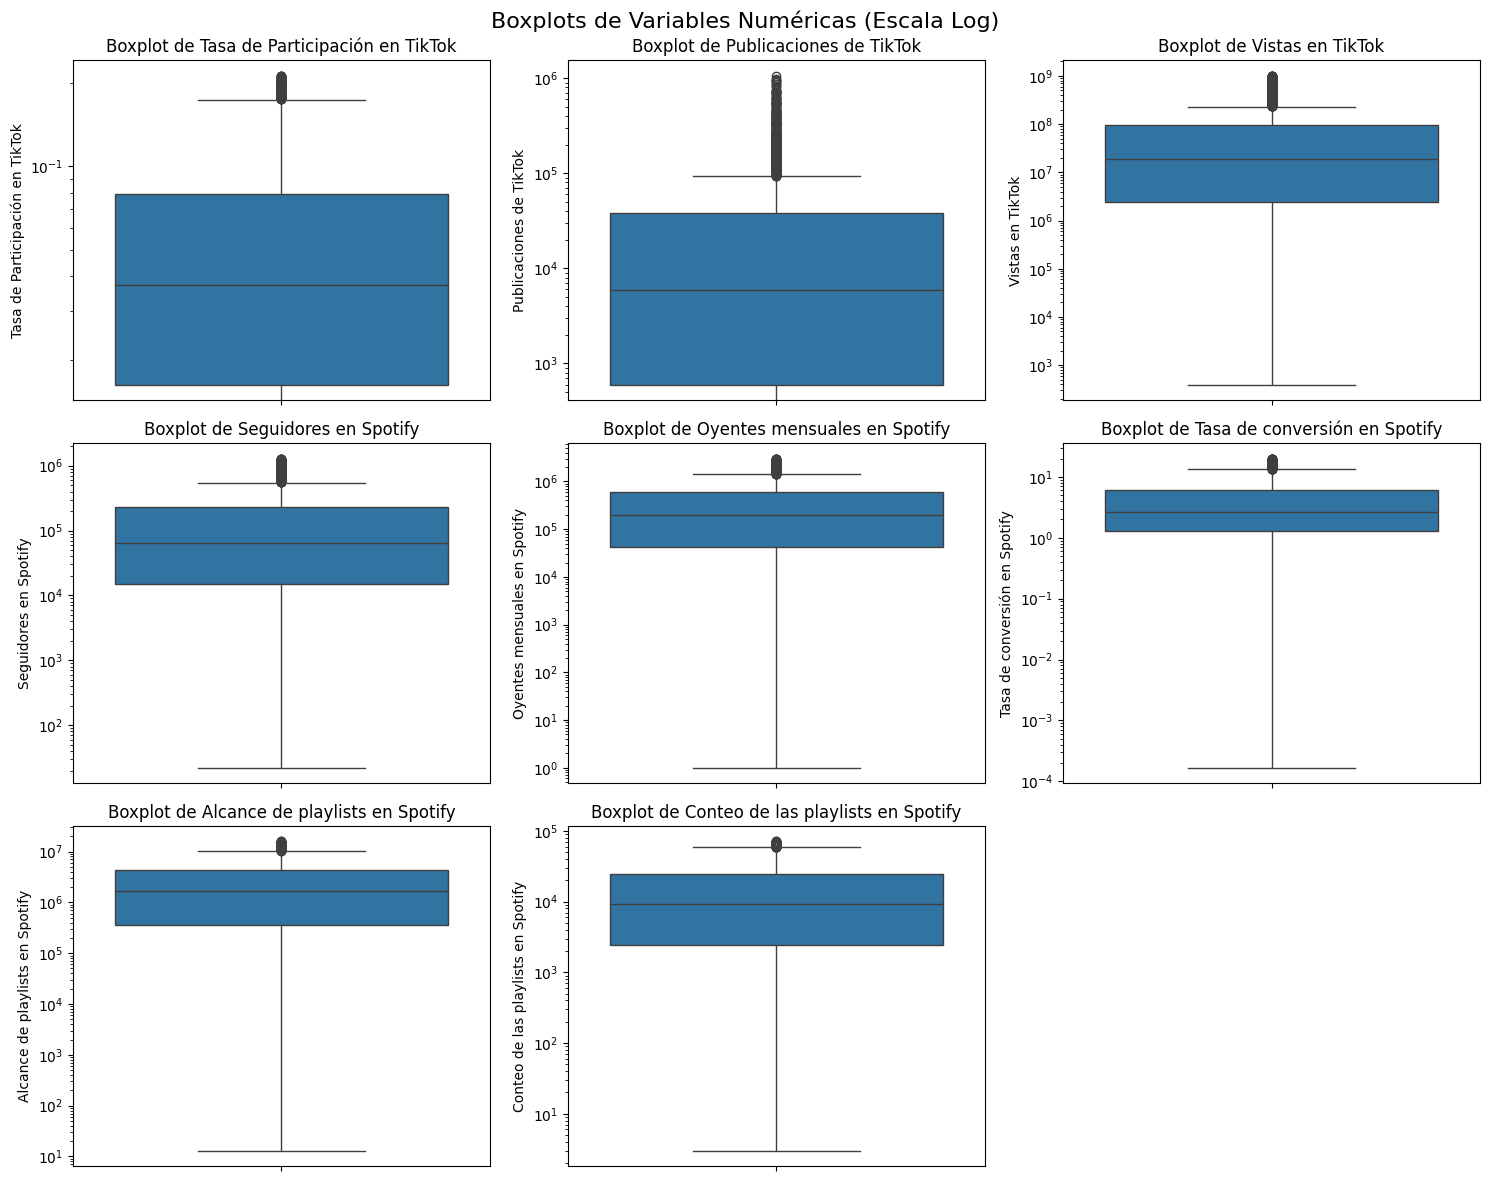

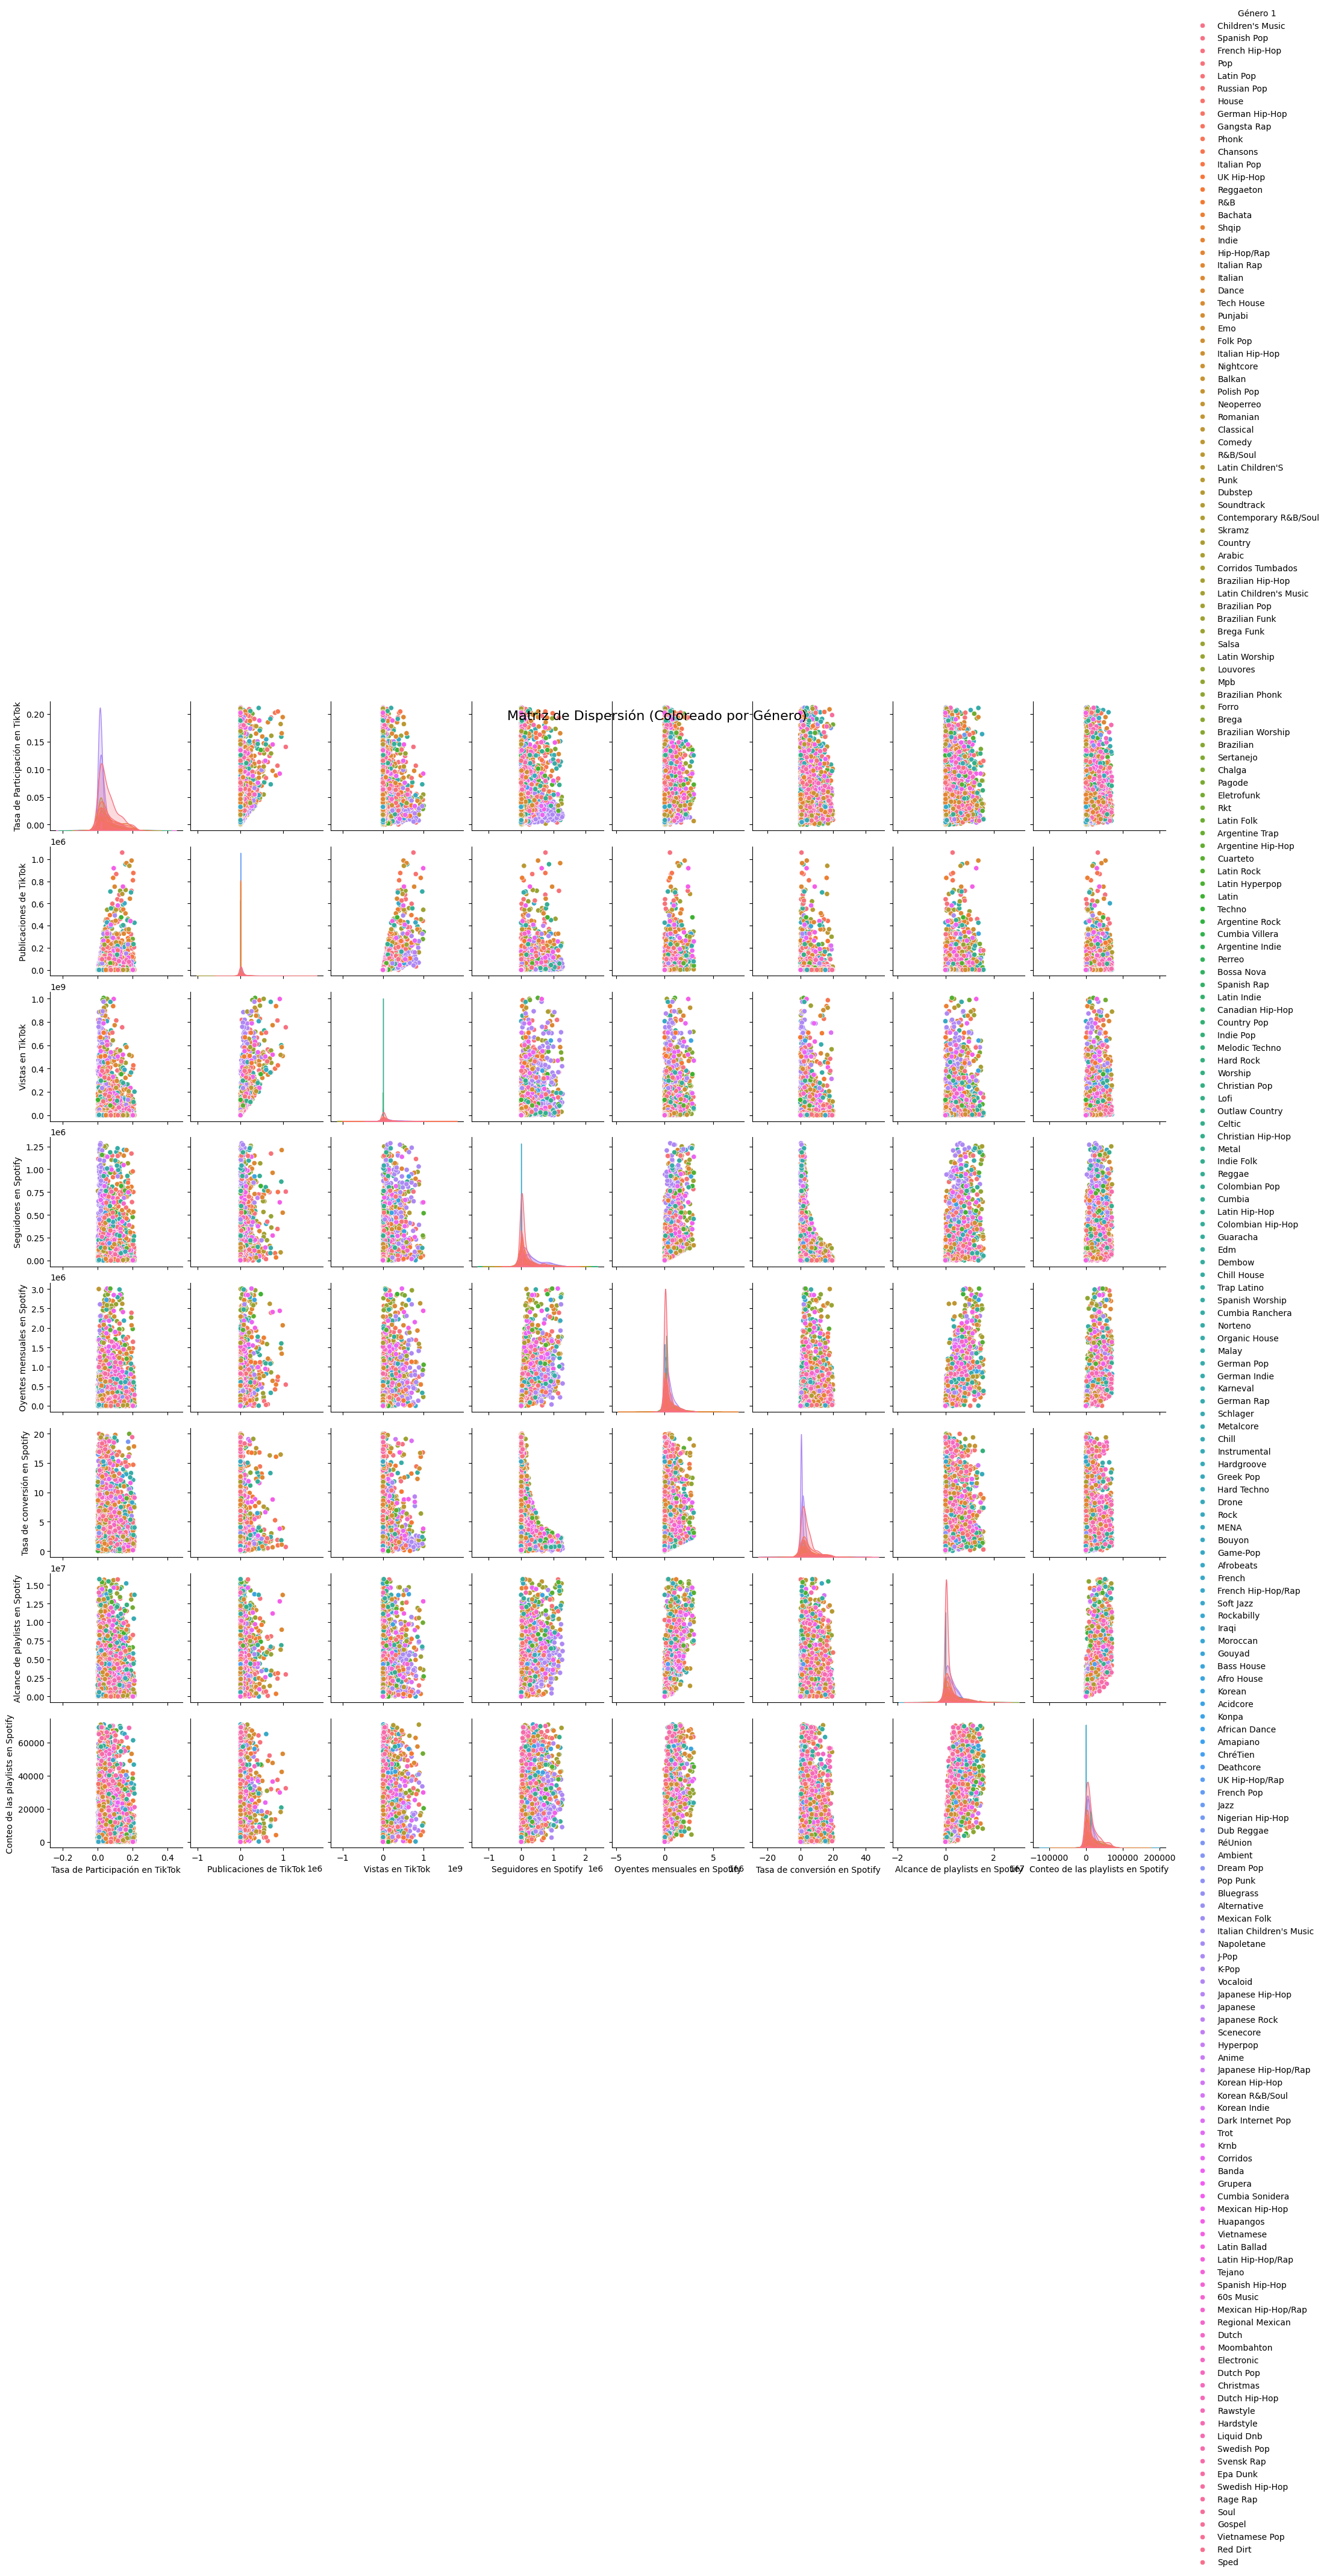

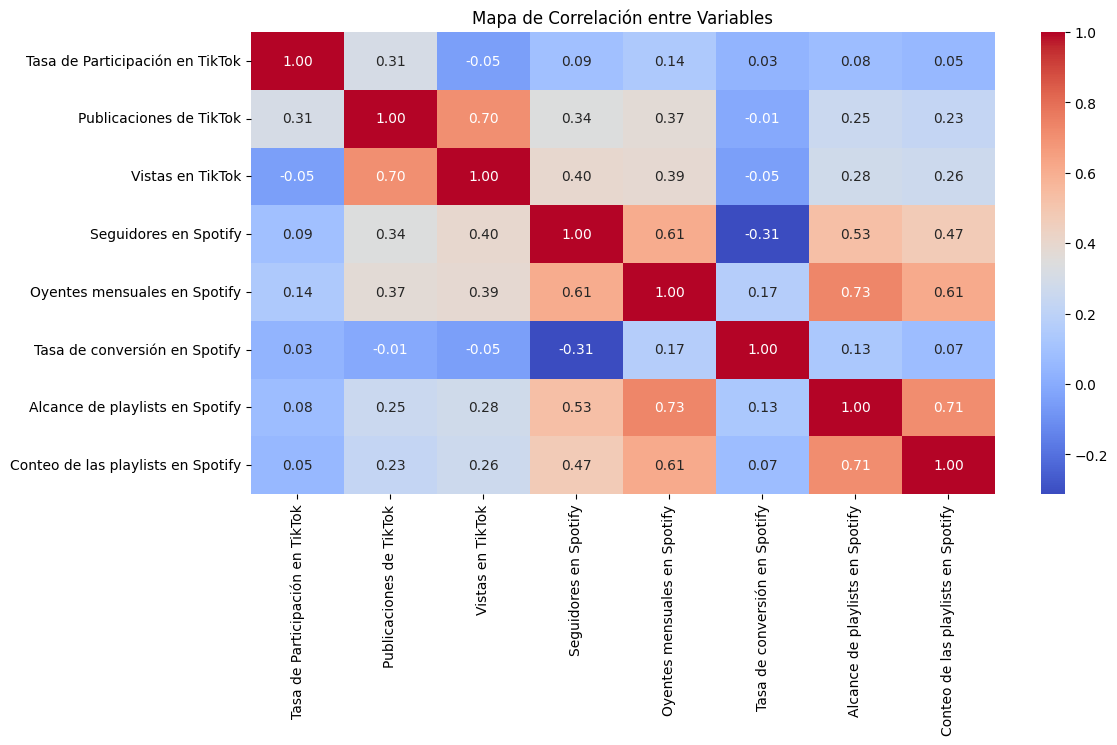

✅ Análisis sin outliers completado


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files


uploaded = files.upload()
df_filename = list(uploaded.keys())[0]


df = pd.read_excel(df_filename)


def estadisticas_descriptivas(df):
    print("\n📊 Medidas de tendencia central y dispersión")
    print(df.describe())

    print("\n📈 Frecuencia de valores categóricos")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\nFrecuencia de {col}:")
        print(df[col].value_counts())

estadisticas_descriptivas(df)


def graficos_descriptivos(df, numeric_cols):
    num_cols = len(numeric_cols)
    rows = (num_cols // 3) + (num_cols % 3 > 0)
    cols = min(3, num_cols)

    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(col)
    plt.suptitle("Distribución de Variables (Sin Outliers)", fontsize=16)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.boxplot(y=df[col])
        plt.yscale("log")
        plt.title(f"Boxplot de {col}")
    plt.suptitle("Boxplots de Variables Numéricas (Escala Log)", fontsize=16)
    plt.tight_layout()
    plt.show()


    sns.pairplot(df, vars=numeric_cols, hue="Género 1", diag_kind='kde')
    plt.suptitle("Matriz de Dispersión (Coloreado por Género)", fontsize=16)
    plt.show()


    plt.figure(figsize=(12, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Mapa de Correlación entre Variables")
    plt.show()

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Chartmetric ID' in numeric_columns:
    numeric_columns.remove('Chartmetric ID')
graficos_descriptivos(df, numeric_columns)

print("✅ Análisis sin outliers completado")




Saving ARTISTAS_LIMPIO (1).xlsx to ARTISTAS_LIMPIO (1) (1).xlsx

📊 Medidas de tendencia central y dispersión
       Chartmetric ID  Tasa de Participación en TikTok  \
count    6.443000e+03                      6443.000000   
mean     1.931128e+06                         0.081229   
std      2.851291e+06                         0.087226   
min      4.000000e+00                         0.008406   
25%      1.483345e+05                         0.024273   
50%      5.661200e+05                         0.049262   
75%      3.390716e+06                         0.099455   
max      1.305551e+07                         0.350029   

       Publicaciones de TikTok  Vistas en TikTok  Seguidores en Spotify  \
count              6443.000000       6443.000000            6443.000000   
mean                 16.537011         45.488486              16.848716   
std                   6.976316         15.151852               4.414332   
min                   0.000000          4.078062               1.674

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

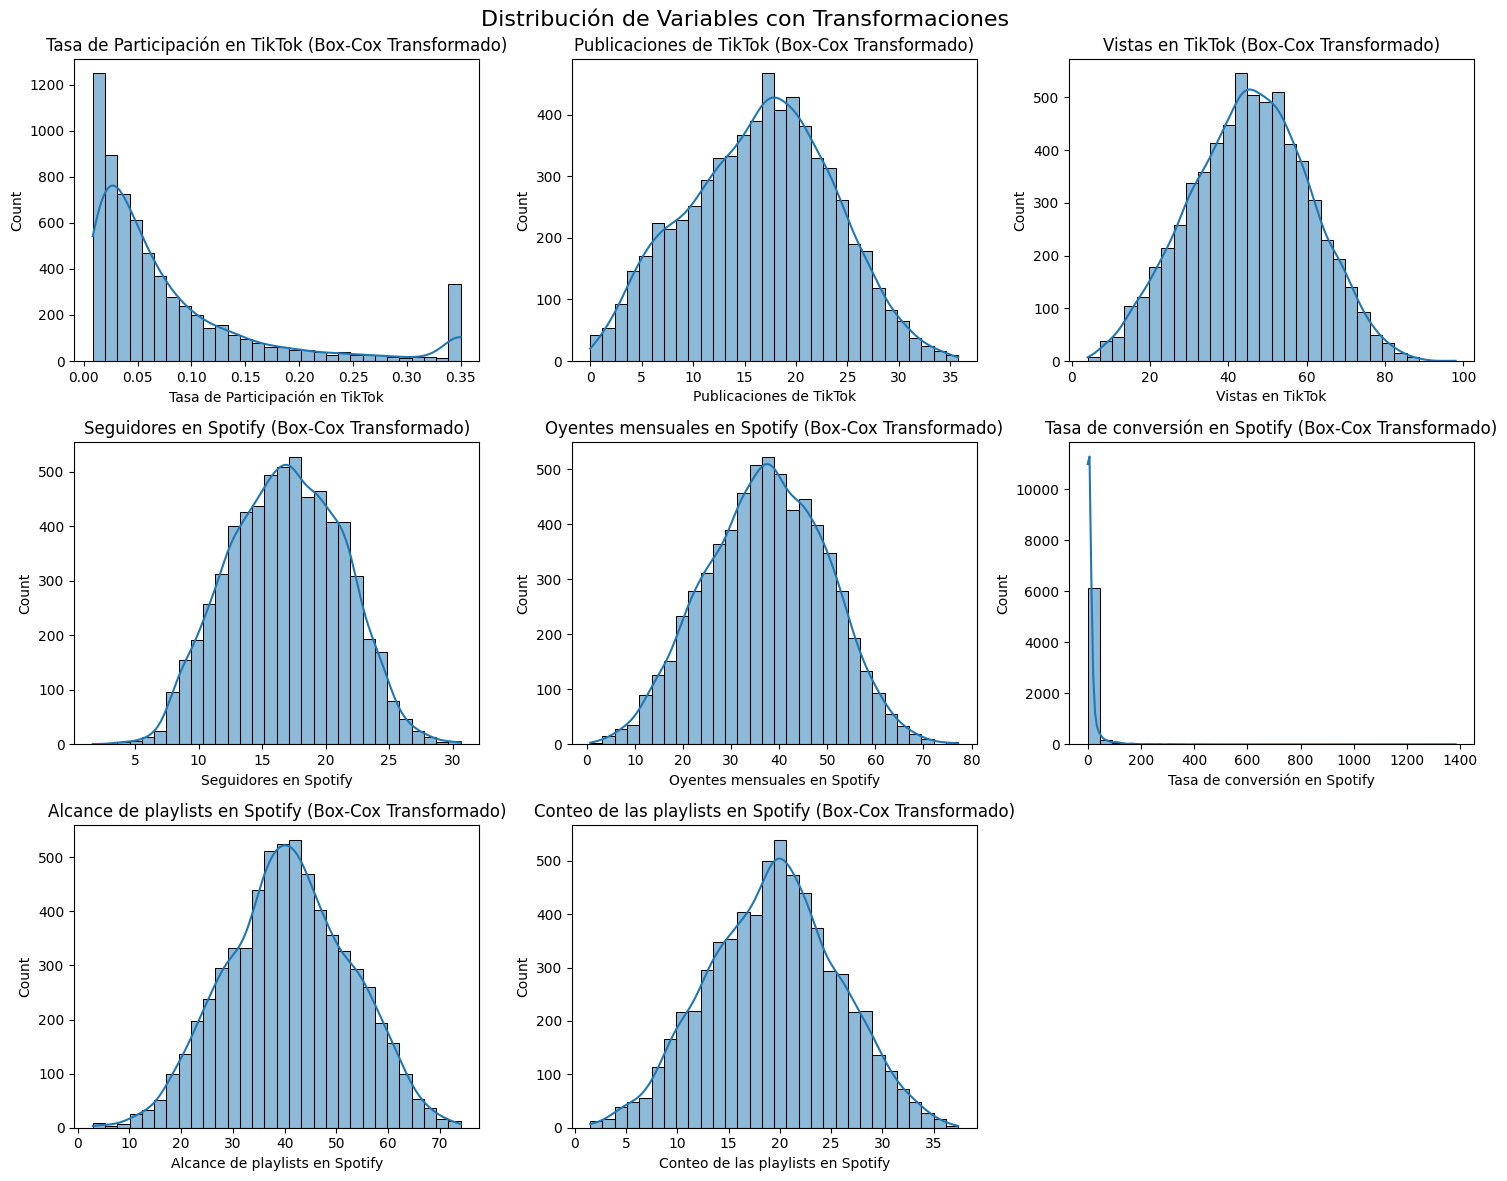

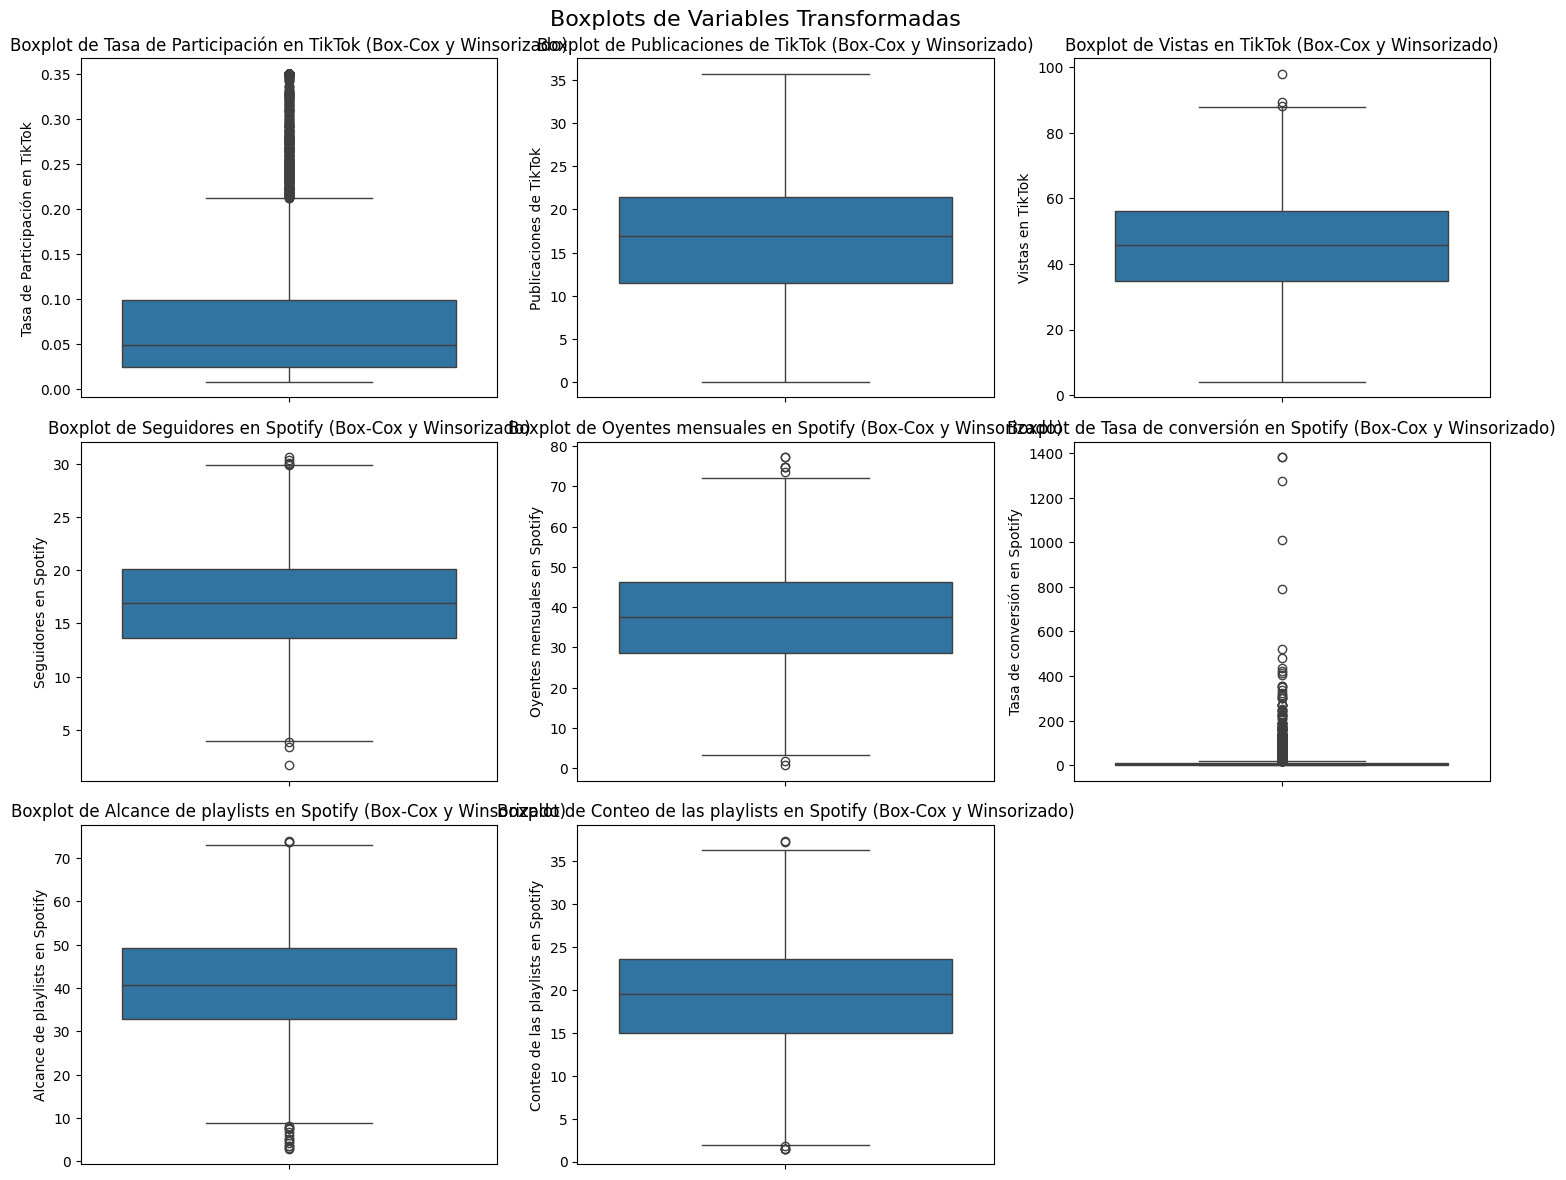

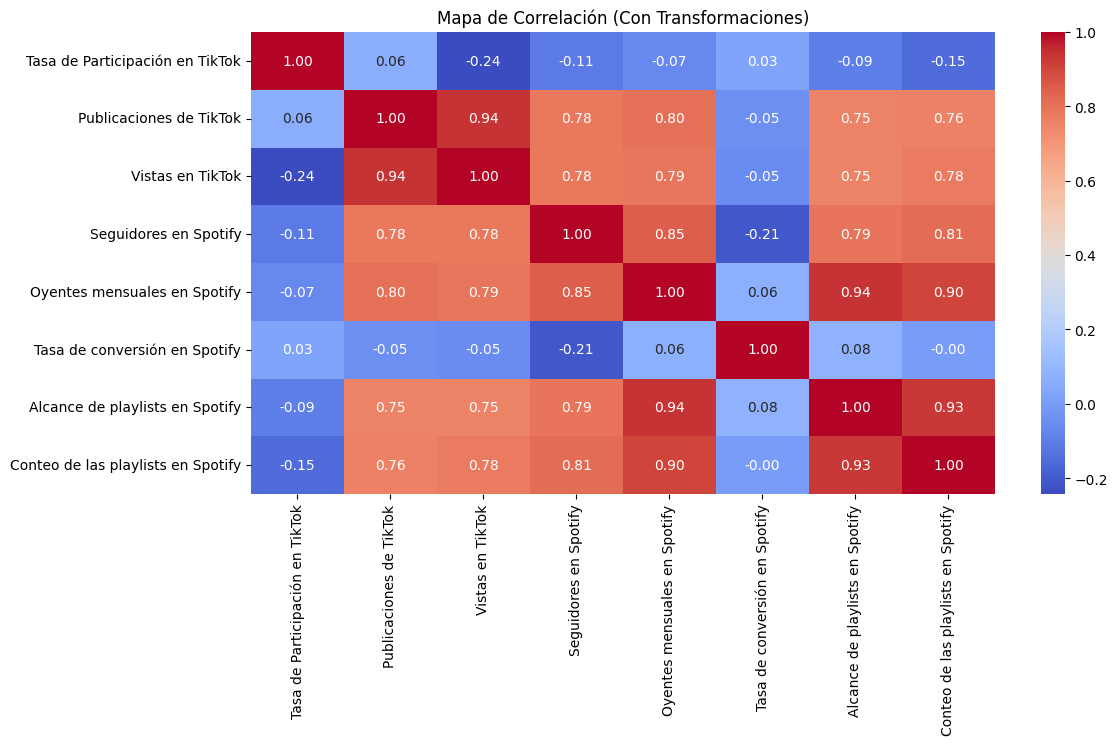

✅ Análisis con transformación Box-Cox y Winsorización completado


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import boxcox
from scipy.stats.mstats import winsorize
from google.colab import files


uploaded = files.upload()
df_filename = list(uploaded.keys())[0]


df = pd.read_excel(df_filename)


variables_a_transformar = [
    "Publicaciones de TikTok", "Vistas en TikTok", "Seguidores en Spotify",
    "Oyentes mensuales en Spotify", "Alcance de playlists en Spotify", "Conteo de las playlists en Spotify"
]

for col in variables_a_transformar:
    df[col], _ = boxcox(df[col] + 1)

df["Tasa de Participación en TikTok"] = winsorize(df["Tasa de Participación en TikTok"], limits=[0.05, 0.05])


def estadisticas_descriptivas(df):
    print("\n📊 Medidas de tendencia central y dispersión")
    print(df.describe())

    print("\n📈 Frecuencia de valores categóricos")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\nFrecuencia de {col}:")
        print(df[col].value_counts())

estadisticas_descriptivas(df)


def graficos_descriptivos(df, numeric_cols):
    num_cols = len(numeric_cols)
    rows = (num_cols // 3) + (num_cols % 3 > 0)
    cols = min(3, num_cols)

    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"{col} (Box-Cox Transformado)")
    plt.suptitle("Distribución de Variables con Transformaciones", fontsize=16)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.boxplot(y=df[col])
        plt.title(f"Boxplot de {col} (Box-Cox y Winsorizado)")
    plt.suptitle("Boxplots de Variables Transformadas", fontsize=16)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(12, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Mapa de Correlación (Con Transformaciones)")
    plt.show()

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Chartmetric ID' in numeric_columns:
    numeric_columns.remove('Chartmetric ID')
graficos_descriptivos(df, numeric_columns)

print("✅ Análisis con transformación Box-Cox y Winsorización completado")



Saving ARTISTAS_LIMPIO (1).xlsx to ARTISTAS_LIMPIO (1) (2).xlsx

📊 Medidas de tendencia central y dispersión
       Chartmetric ID  Tasa de Participación en TikTok  \
count    6.443000e+03                      6443.000000   
mean     1.931128e+06                         0.081229   
std      2.851291e+06                         0.087226   
min      4.000000e+00                         0.008406   
25%      1.483345e+05                         0.024273   
50%      5.661200e+05                         0.049262   
75%      3.390716e+06                         0.099455   
max      1.305551e+07                         0.350029   

       Publicaciones de TikTok  Vistas en TikTok  Seguidores en Spotify  \
count              6443.000000       6443.000000            6443.000000   
mean                 16.537011         45.488486              16.848716   
std                   6.976316         15.151852               4.414332   
min                   0.000000          4.078062               1.674

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

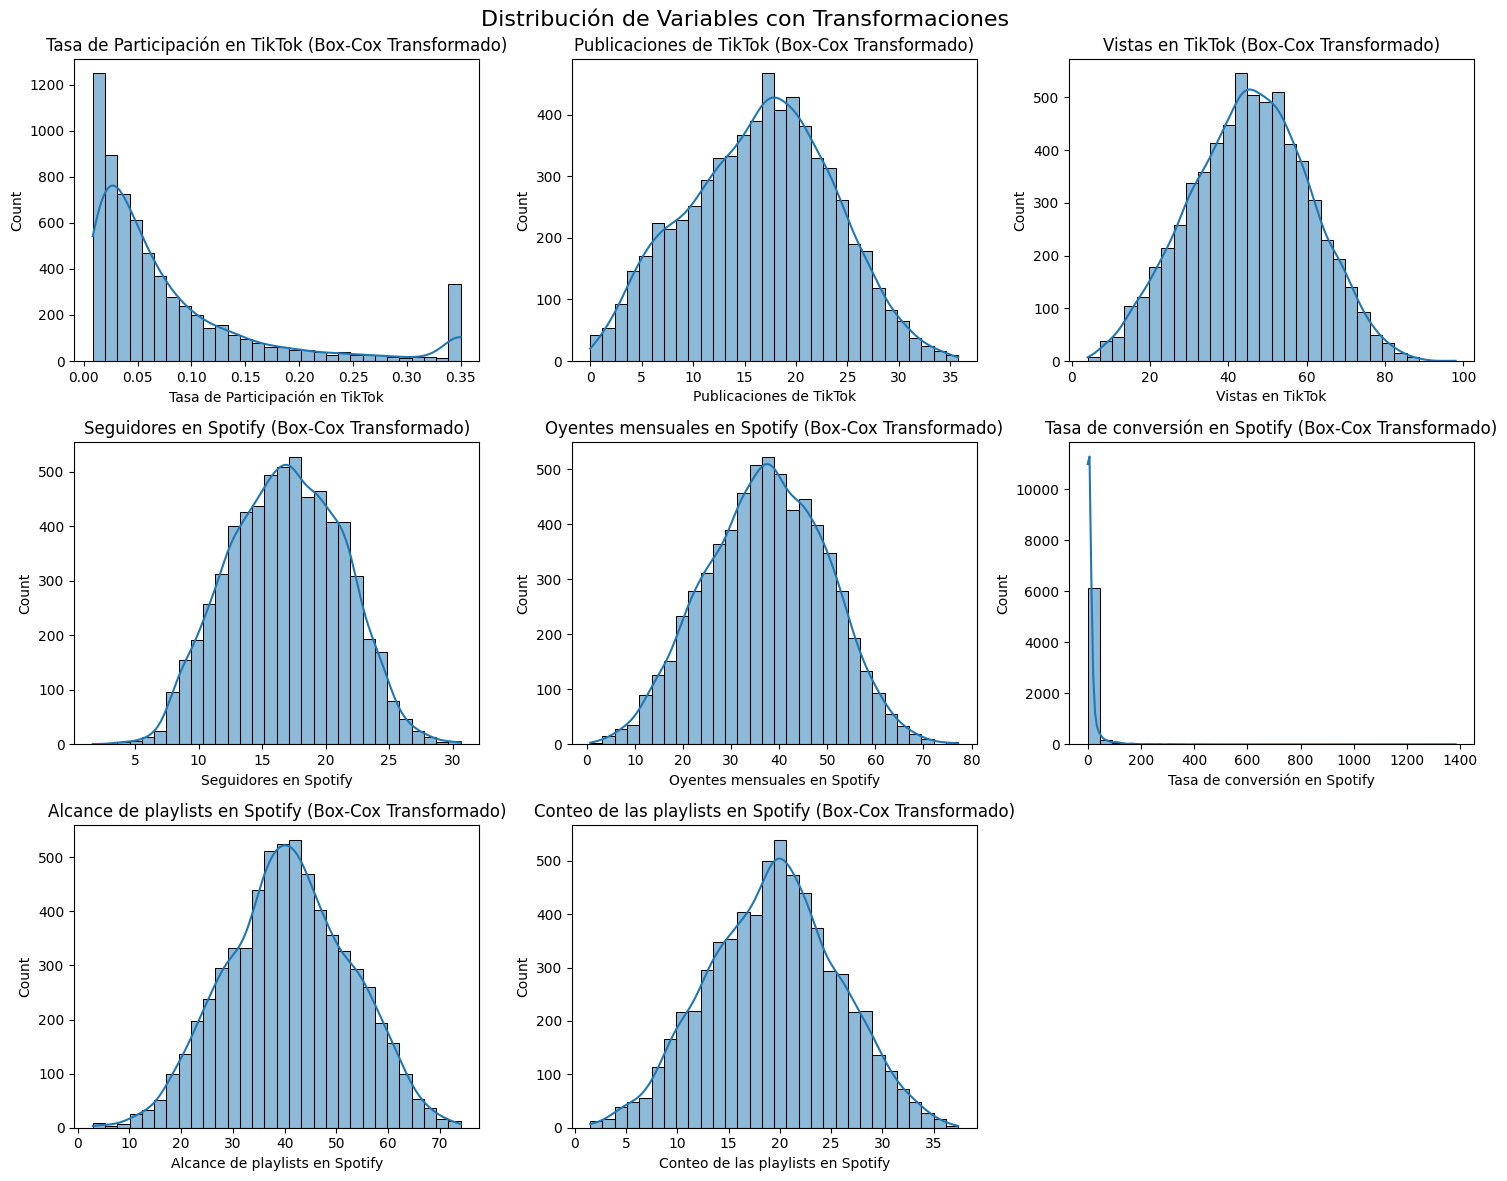

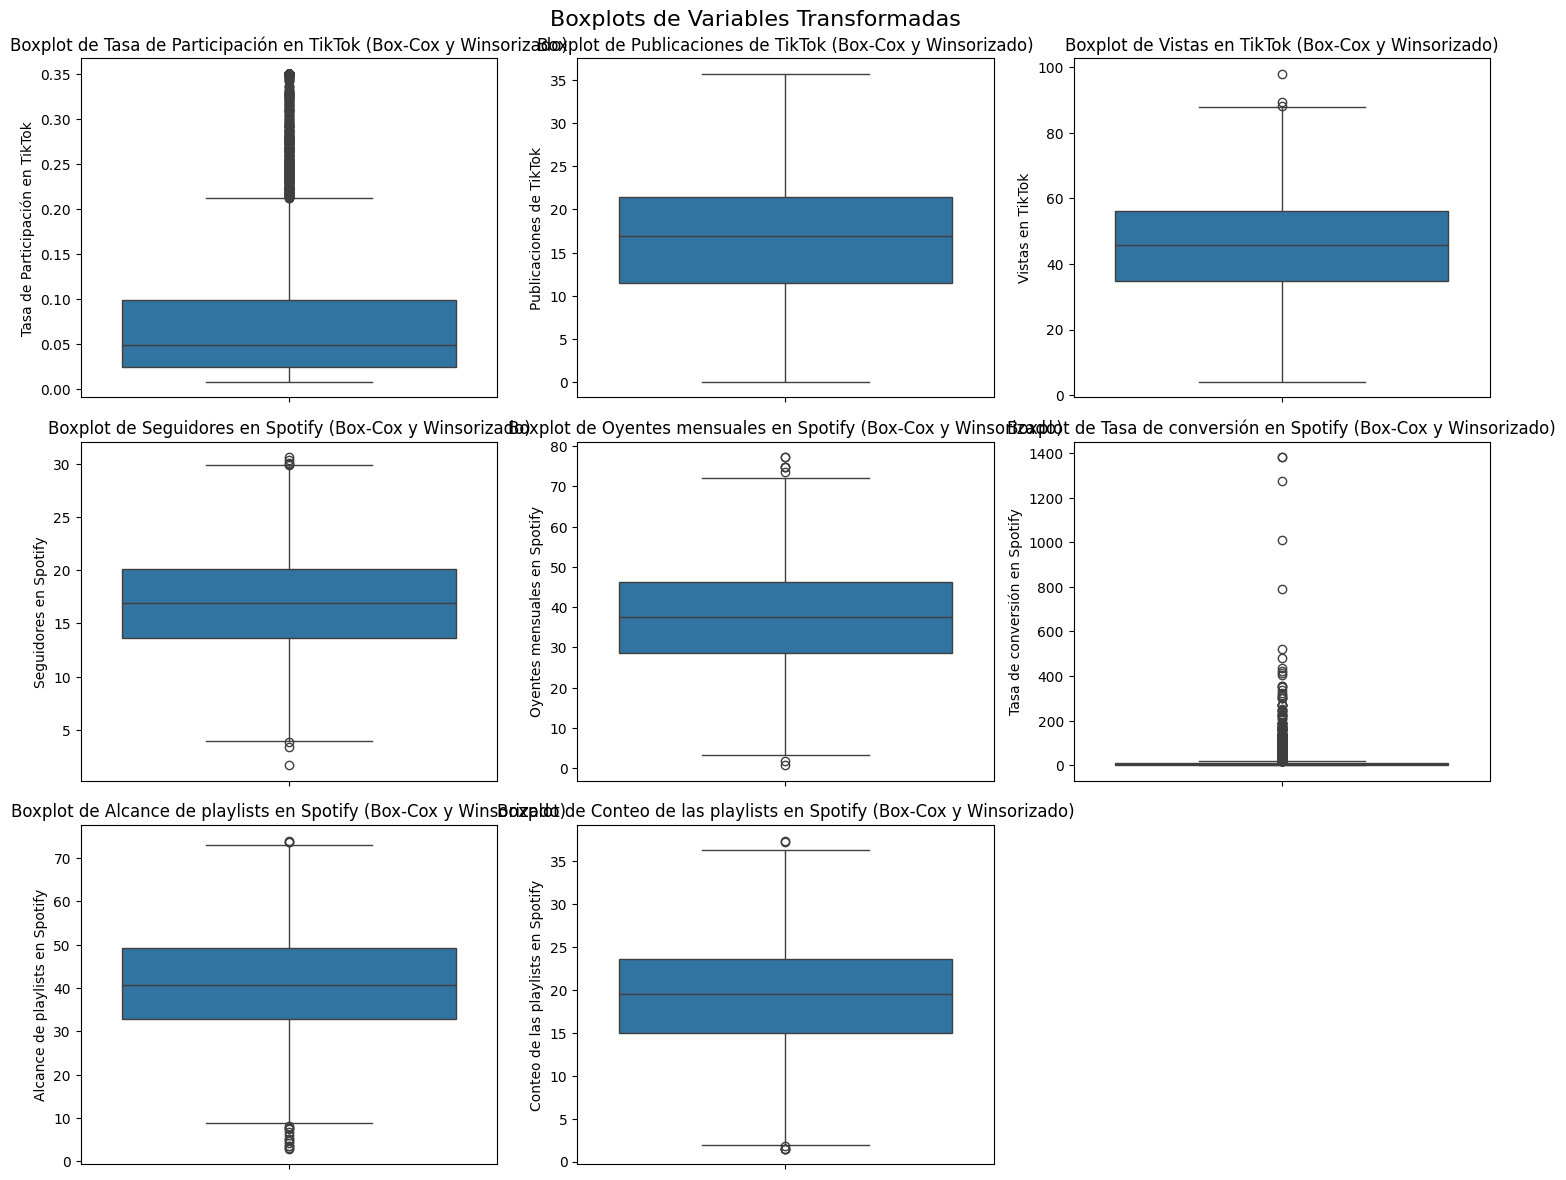

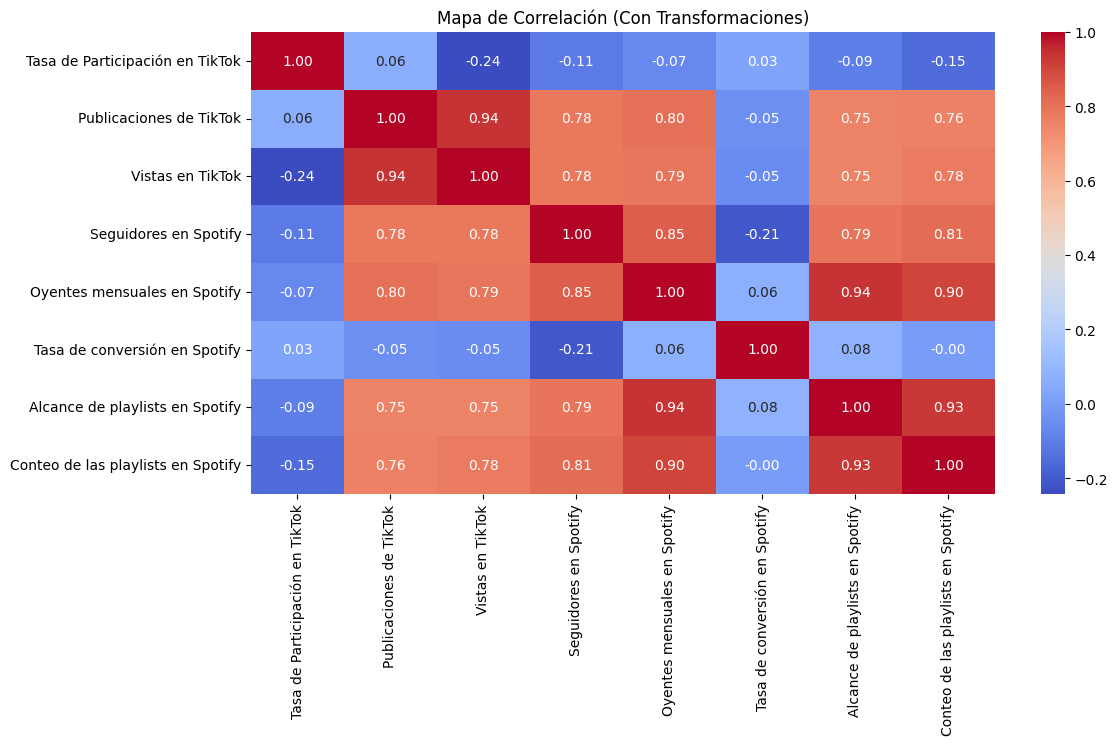

✅ Análisis con transformación Box-Cox y Winsorización completado


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import boxcox
from scipy.stats.mstats import winsorize
from google.colab import files


uploaded = files.upload()
df_filename = list(uploaded.keys())[0]


df = pd.read_excel(df_filename)


variables_a_transformar = [
    "Publicaciones de TikTok", "Vistas en TikTok", "Seguidores en Spotify",
    "Oyentes mensuales en Spotify", "Alcance de playlists en Spotify", "Conteo de las playlists en Spotify"
]

for col in variables_a_transformar:
    df[col], _ = boxcox(df[col] + 1)

df["Tasa de Participación en TikTok"] = winsorize(df["Tasa de Participación en TikTok"], limits=[0.05, 0.05])


def estadisticas_descriptivas(df):
    print("\n📊 Medidas de tendencia central y dispersión")
    print(df.describe())

    print("\n📈 Frecuencia de valores categóricos")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\nFrecuencia de {col}:")
        print(df[col].value_counts())

estadisticas_descriptivas(df)


def graficos_descriptivos(df, numeric_cols):
    num_cols = len(numeric_cols)
    rows = (num_cols // 3) + (num_cols % 3 > 0)
    cols = min(3, num_cols)

    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"{col} (Box-Cox Transformado)")
    plt.suptitle("Distribución de Variables con Transformaciones", fontsize=16)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.boxplot(y=df[col])
        plt.title(f"Boxplot de {col} (Box-Cox y Winsorizado)")
    plt.suptitle("Boxplots de Variables Transformadas", fontsize=16)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(12, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Mapa de Correlación (Con Transformaciones)")
    plt.show()

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Chartmetric ID' in numeric_columns:
    numeric_columns.remove('Chartmetric ID')
graficos_descriptivos(df, numeric_columns)

print("✅ Análisis con transformación Box-Cox y Winsorización completado")


Saving ARTISTAS_LIMPIO (1).xlsx to ARTISTAS_LIMPIO (1) (3).xlsx

📊 Medidas de tendencia central y dispersión
       Chartmetric ID  Tasa de Participación en TikTok  \
count    6.443000e+03                      6443.000000   
mean     1.931128e+06                         0.081229   
std      2.851291e+06                         0.087226   
min      4.000000e+00                         0.008406   
25%      1.483345e+05                         0.024273   
50%      5.661200e+05                         0.049262   
75%      3.390716e+06                         0.099455   
max      1.305551e+07                         0.350029   

       Publicaciones de TikTok  Vistas en TikTok  Seguidores en Spotify  \
count              6443.000000       6443.000000            6443.000000   
mean                 16.537011         45.488486              16.848716   
std                   6.976316         15.151852               4.414332   
min                   0.000000          4.078062               1.674

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

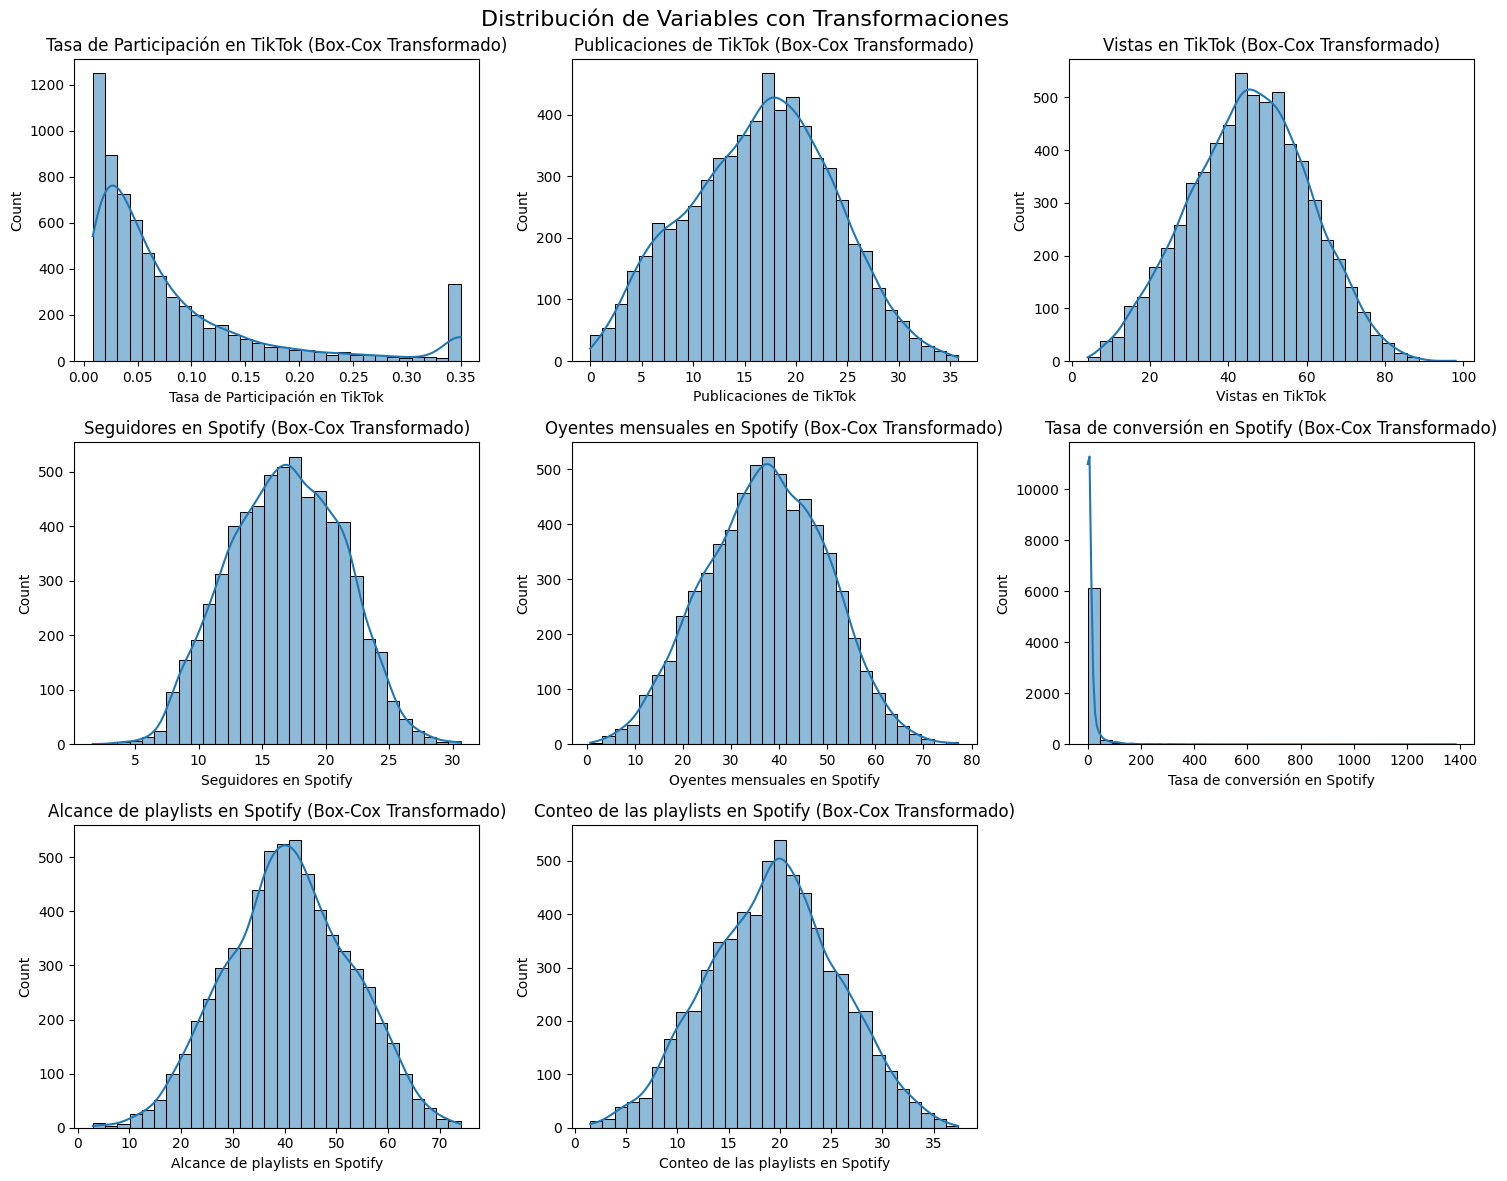

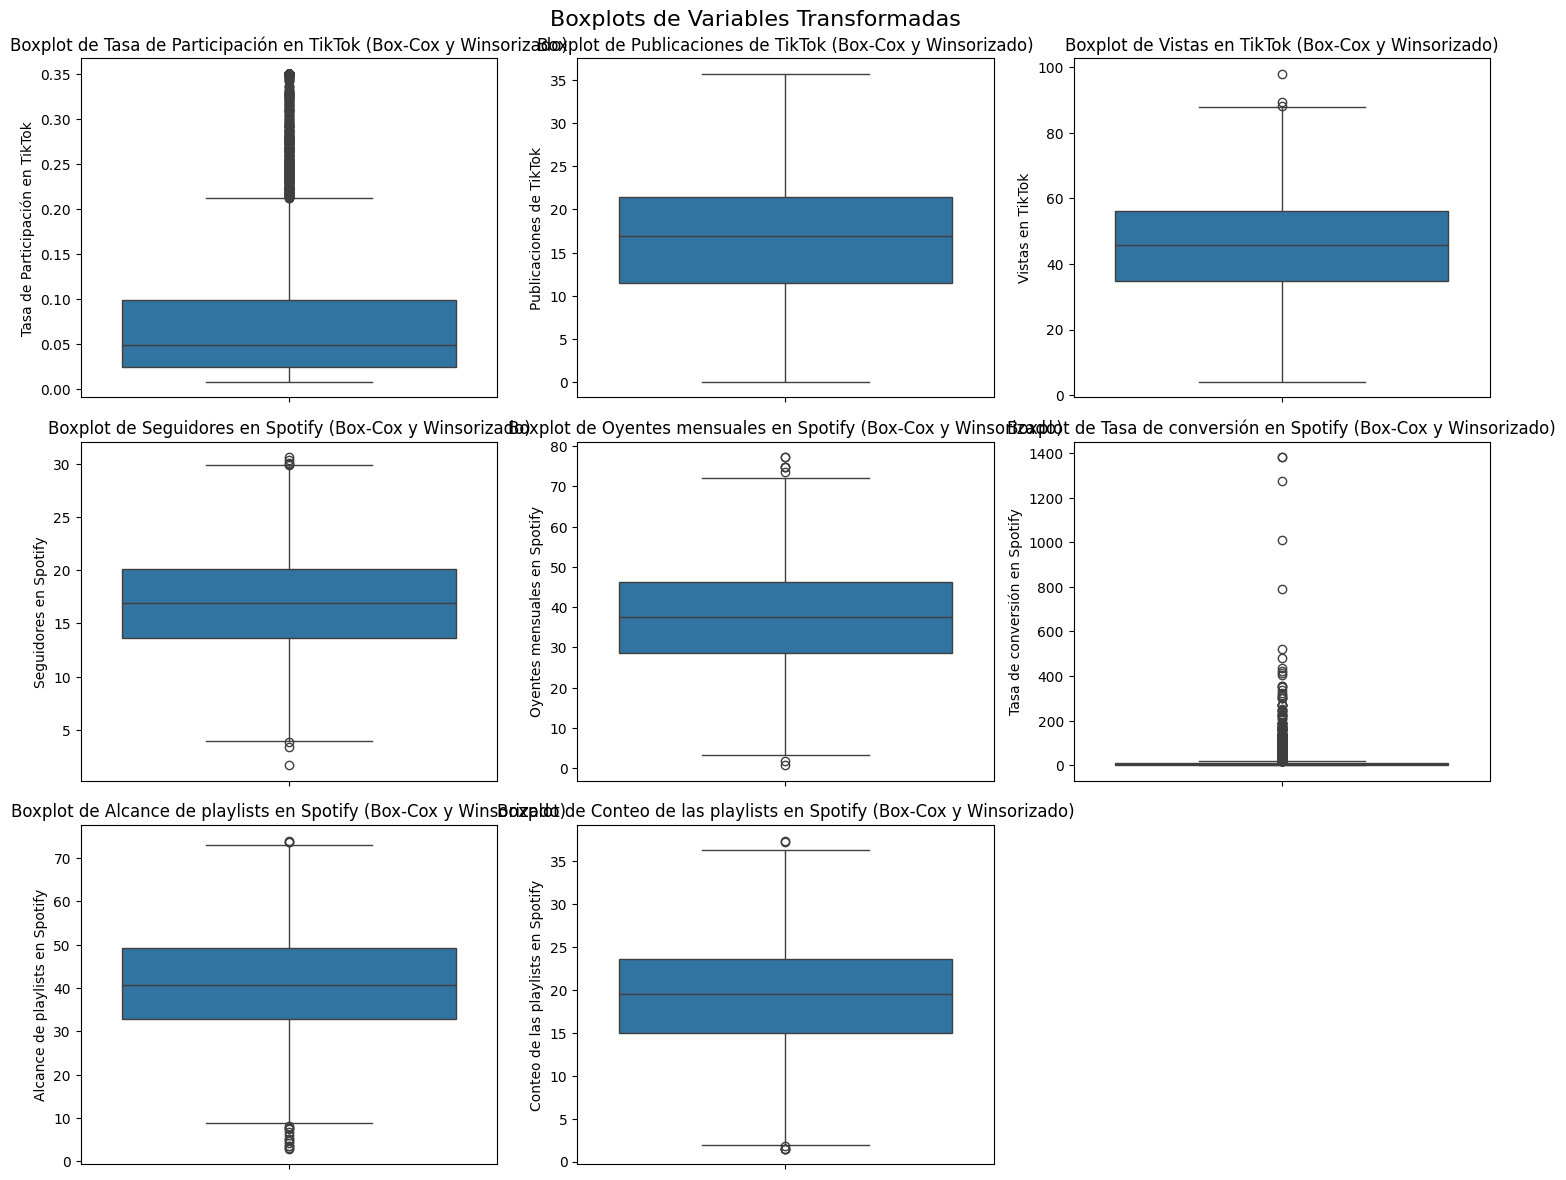

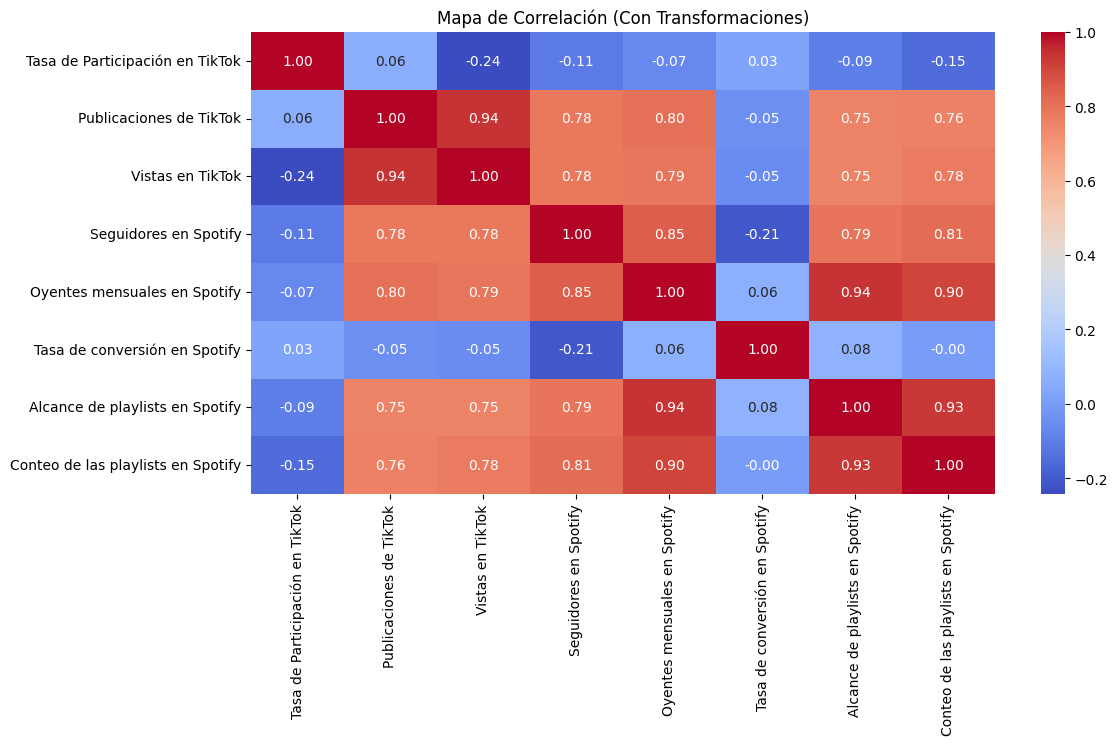

✅ Análisis con transformación Box-Cox y Winsorización completado


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import boxcox
from scipy.stats.mstats import winsorize
from google.colab import files


uploaded = files.upload()
df_filename = list(uploaded.keys())[0]


df = pd.read_excel(df_filename)


variables_a_transformar = [
    "Publicaciones de TikTok", "Vistas en TikTok", "Seguidores en Spotify",
    "Oyentes mensuales en Spotify", "Alcance de playlists en Spotify", "Conteo de las playlists en Spotify"
]

for col in variables_a_transformar:
    df[col], _ = boxcox(df[col] + 1)

df["Tasa de Participación en TikTok"] = winsorize(df["Tasa de Participación en TikTok"], limits=[0.05, 0.05])


def estadisticas_descriptivas(df):
    print("\n📊 Medidas de tendencia central y dispersión")
    print(df.describe())

    print("\n📈 Frecuencia de valores categóricos")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\nFrecuencia de {col}:")
        print(df[col].value_counts())

estadisticas_descriptivas(df)


def graficos_descriptivos(df, numeric_cols):
    num_cols = len(numeric_cols)
    rows = (num_cols // 3) + (num_cols % 3 > 0)
    cols = min(3, num_cols)

    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"{col} (Box-Cox Transformado)")
    plt.suptitle("Distribución de Variables con Transformaciones", fontsize=16)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.boxplot(y=df[col])
        plt.title(f"Boxplot de {col} (Box-Cox y Winsorizado)")
    plt.suptitle("Boxplots de Variables Transformadas", fontsize=16)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(12, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Mapa de Correlación (Con Transformaciones)")
    plt.show()

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Chartmetric ID' in numeric_columns:
    numeric_columns.remove('Chartmetric ID')
graficos_descriptivos(df, numeric_columns)

print("✅ Análisis con transformación Box-Cox y Winsorización completado")


Saving ARTISTAS_LIMPIO (1).xlsx to ARTISTAS_LIMPIO (1) (4).xlsx

📊 Medidas de tendencia central y dispersión
       Chartmetric ID  Tasa de Participación en TikTok  \
count    6.443000e+03                      6443.000000   
mean     1.931128e+06                         0.081229   
std      2.851291e+06                         0.087226   
min      4.000000e+00                         0.008406   
25%      1.483345e+05                         0.024273   
50%      5.661200e+05                         0.049262   
75%      3.390716e+06                         0.099455   
max      1.305551e+07                         0.350029   

       Publicaciones de TikTok  Vistas en TikTok  Seguidores en Spotify  \
count              6443.000000       6443.000000            6443.000000   
mean                 16.537011         45.488486              16.848716   
std                   6.976316         15.151852               4.414332   
min                   0.000000          4.078062               1.674

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

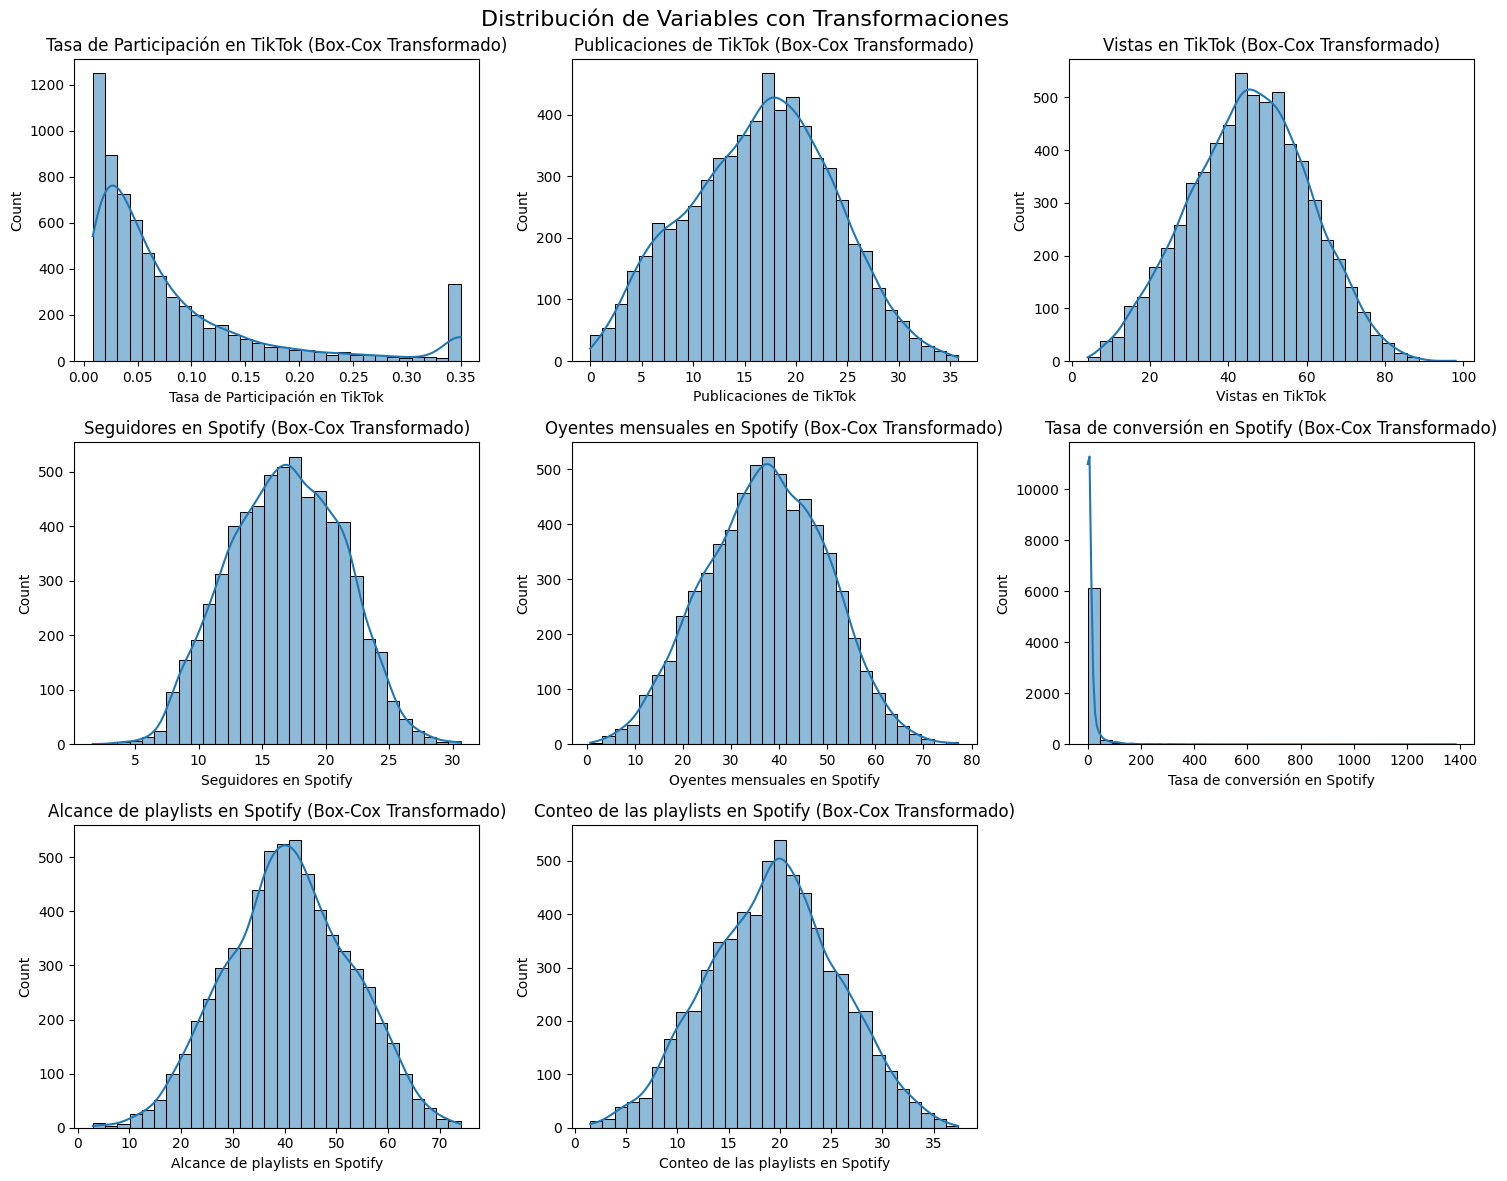

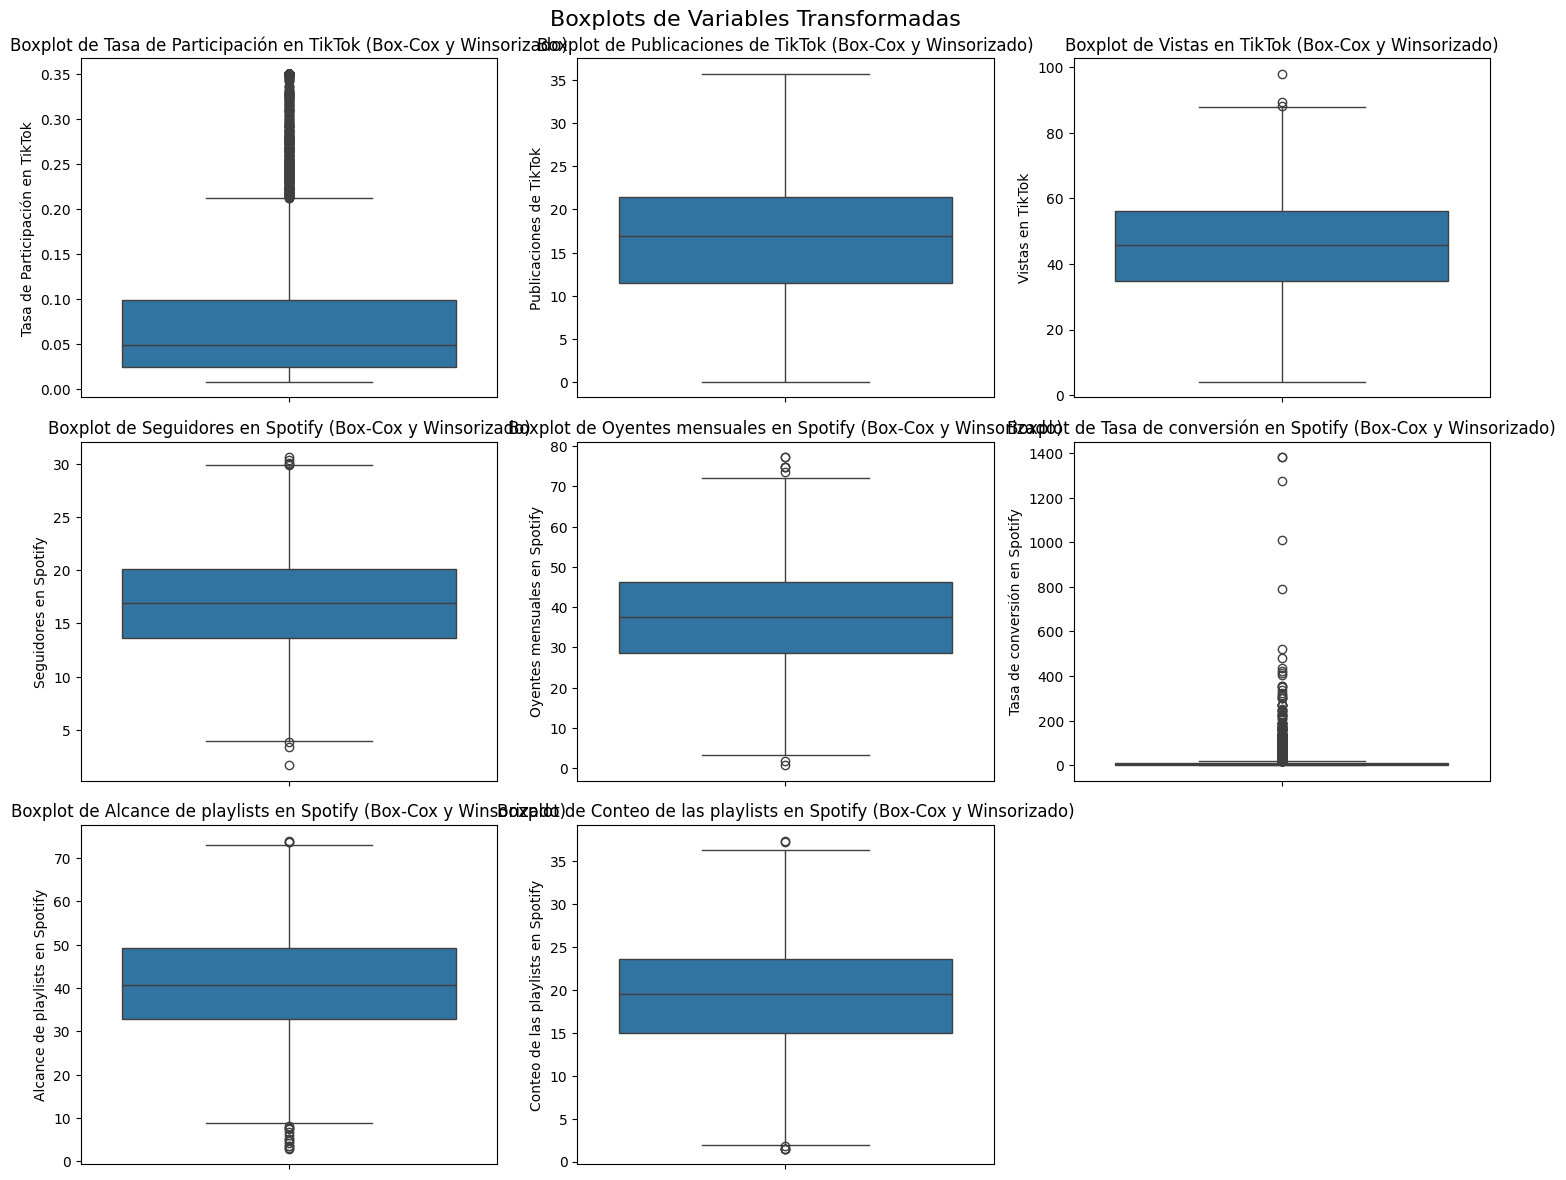

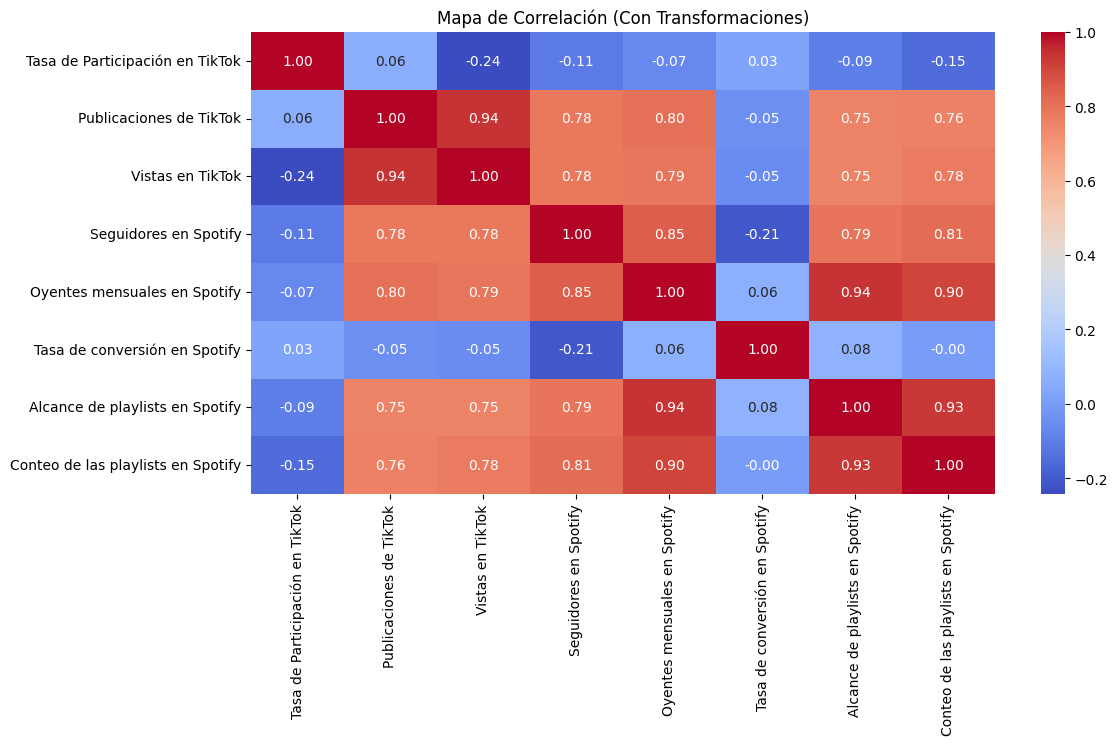

✅ Análisis con transformación Box-Cox y Winsorización completado


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import boxcox
from scipy.stats.mstats import winsorize
from google.colab import files


uploaded = files.upload()
df_filename = list(uploaded.keys())[0]


df = pd.read_excel(df_filename)


variables_a_transformar = [
    "Publicaciones de TikTok", "Vistas en TikTok", "Seguidores en Spotify",
    "Oyentes mensuales en Spotify", "Alcance de playlists en Spotify", "Conteo de las playlists en Spotify"
]

for col in variables_a_transformar:
    df[col], _ = boxcox(df[col] + 1)

df["Tasa de Participación en TikTok"] = winsorize(df["Tasa de Participación en TikTok"], limits=[0.05, 0.05])


def estadisticas_descriptivas(df):
    print("\n📊 Medidas de tendencia central y dispersión")
    print(df.describe())

    print("\n📈 Frecuencia de valores categóricos")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\nFrecuencia de {col}:")
        print(df[col].value_counts())

estadisticas_descriptivas(df)


def graficos_descriptivos(df, numeric_cols):
    num_cols = len(numeric_cols)
    rows = (num_cols // 3) + (num_cols % 3 > 0)
    cols = min(3, num_cols)

    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"{col} (Box-Cox Transformado)")
    plt.suptitle("Distribución de Variables con Transformaciones", fontsize=16)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.boxplot(y=df[col])
        plt.title(f"Boxplot de {col} (Box-Cox y Winsorizado)")
    plt.suptitle("Boxplots de Variables Transformadas", fontsize=16)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(12, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Mapa de Correlación (Con Transformaciones)")
    plt.show()

numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Chartmetric ID' in numeric_columns:
    numeric_columns.remove('Chartmetric ID')
graficos_descriptivos(df, numeric_columns)

print("✅ Análisis con transformación Box-Cox y Winsorización completado")


Saving ARTISTAS_LIMPIO (1).xlsx to ARTISTAS_LIMPIO (1) (7).xlsx

📊 Medidas de tendencia central y dispersión:
       Publicaciones de TikTok  Vistas en TikTok  Seguidores en Spotify  \
count             6.443000e+03      6.443000e+03           6.443000e+03   
mean              8.813626e+05      1.516846e+09           1.694521e+06   
std               3.018586e+06      5.466556e+09           5.697762e+06   
min               0.000000e+00      3.200000e+01           4.000000e+00   
25%               4.346000e+03      1.011504e+07           3.407250e+04   
50%               6.417100e+04      1.171726e+08           2.210580e+05   
75%               4.357180e+05      8.023614e+08           1.204821e+06   
max               4.800064e+07      2.197153e+11           1.312953e+08   

       Oyentes mensuales en Spotify  Alcance de playlists en Spotify  \
count                  6.443000e+03                     6.443000e+03   
mean                   4.141856e+06                     3.723669e+07  

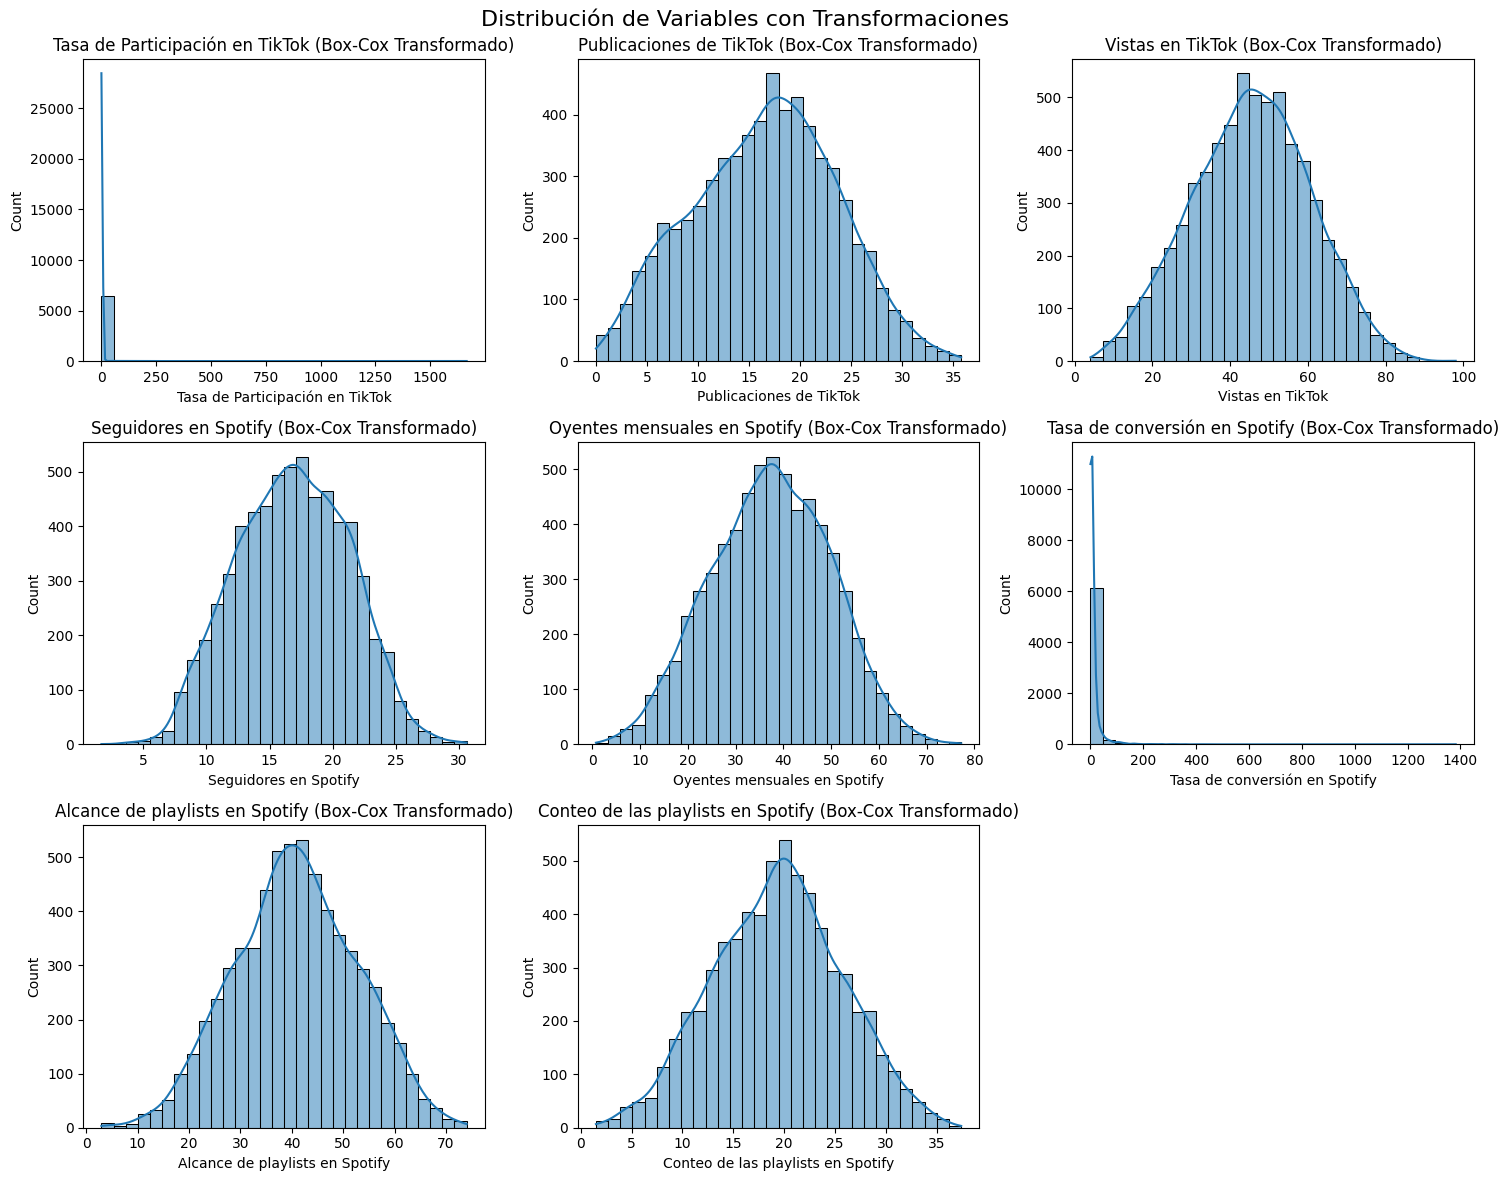

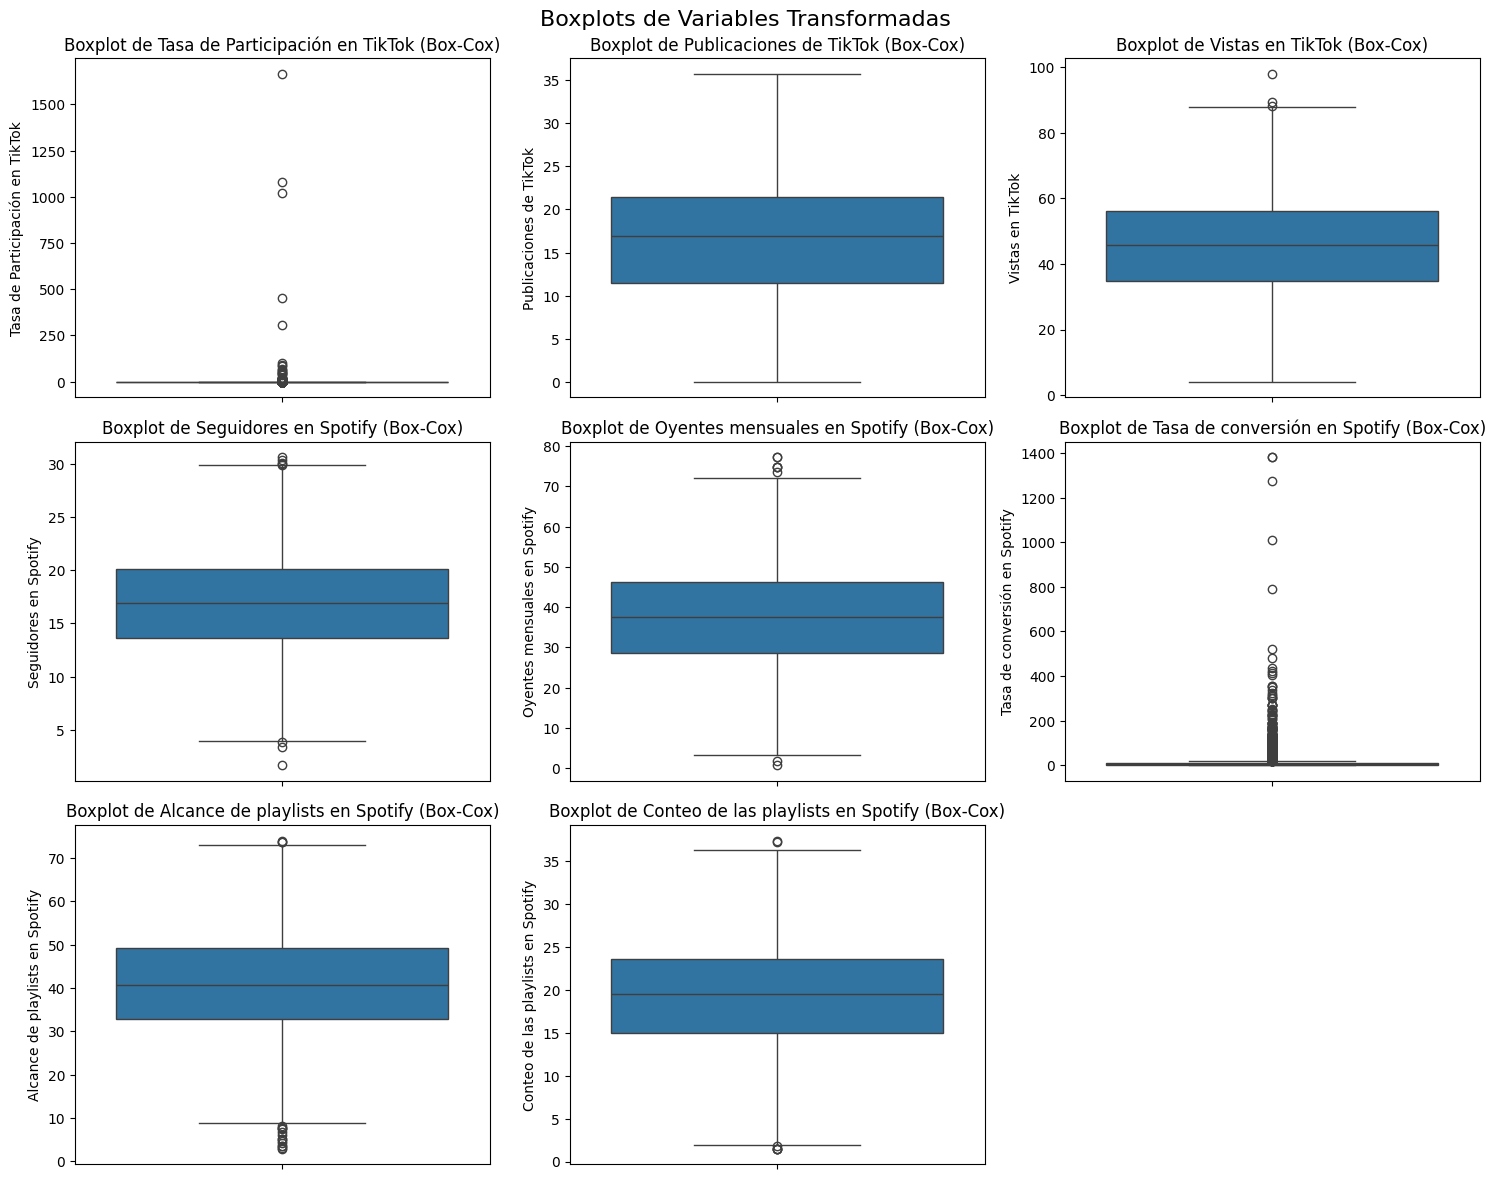

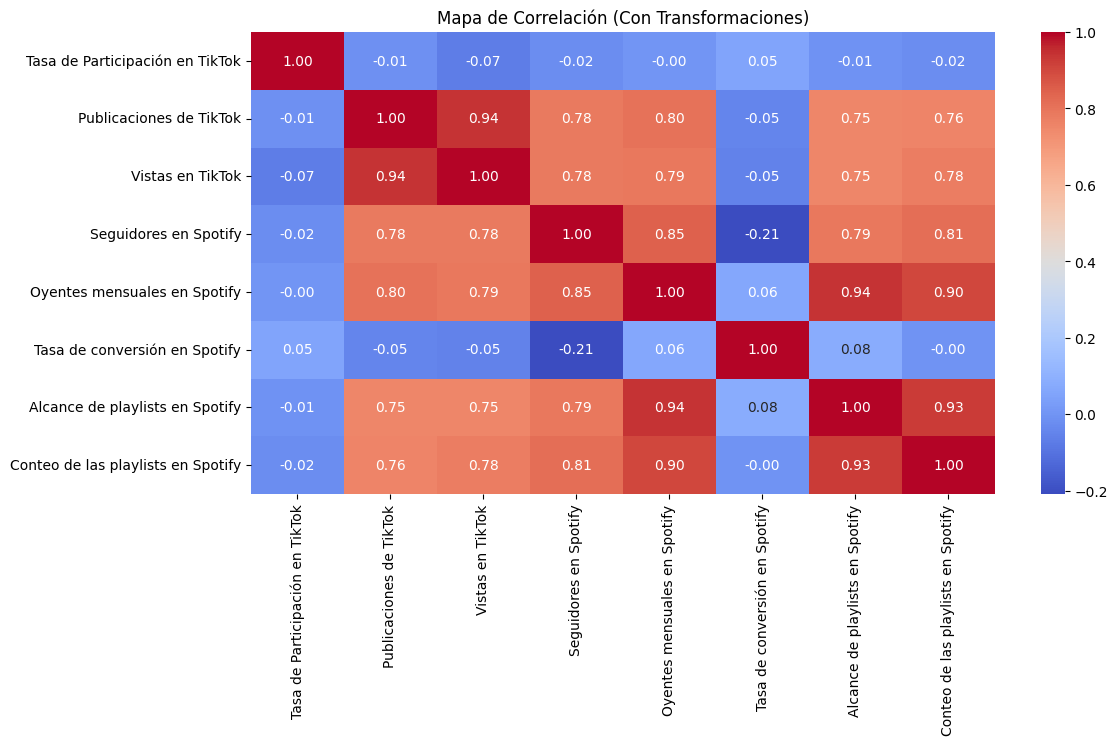

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Análisis avanzado completado. El archivo se ha guardado como 'BASE_DE_DATOS_ARTISTAS_ANALIZADA.xlsx'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import boxcox
from scipy.stats import skew, kurtosis
from google.colab import files


uploaded = files.upload()
df_filename = list(uploaded.keys())[0]


df = pd.read_excel(df_filename)


def medidas_estadisticas(df, variables):

    print("\n📊 Medidas de tendencia central y dispersión:")
    print(df[variables].describe())


    print("\n📉 Asimetría y Curtosis:")
    for col in variables:
        print(f"{col}: Asimetría = {skew(df[col]):.4f}, Curtosis = {kurtosis(df[col]):.4f}")


    print("\n🔗 Correlaciones entre variables:")
    print(df[variables].corr())


variables_a_transformar = [
    "Publicaciones de TikTok", "Vistas en TikTok", "Seguidores en Spotify",
    "Oyentes mensuales en Spotify", "Alcance de playlists en Spotify", "Conteo de las playlists en Spotify"
]


medidas_estadisticas(df, variables_a_transformar)



for col in variables_a_transformar:
    df[col], _ = boxcox(df[col] + 1)


def graficos_descriptivos(df, numeric_cols):
    num_cols = len(numeric_cols)
    rows = (num_cols // 3) + (num_cols % 3 > 0)
    cols = min(3, num_cols)

    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"{col} (Box-Cox Transformado)")
    plt.suptitle("Distribución de Variables con Transformaciones", fontsize=16)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.boxplot(y=df[col])
        plt.title(f"Boxplot de {col} (Box-Cox)")
    plt.suptitle("Boxplots de Variables Transformadas", fontsize=16)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(12, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Mapa de Correlación (Con Transformaciones)")
    plt.show()


numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Chartmetric ID' in numeric_columns:
    numeric_columns.remove('Chartmetric ID')

graficos_descriptivos(df, numeric_columns)



output_path = "/content/BASE_DE_DATOS_ARTISTAS_ANALIZADA.xlsx"
df.to_excel(output_path, index=False)


files.download(output_path)
print("✅ Análisis avanzado completado. El archivo se ha guardado como 'BASE_DE_DATOS_ARTISTAS_ANALIZADA.xlsx'.")



Saving ARTISTAS_LIMPIO (1).xlsx to ARTISTAS_LIMPIO (1) (8).xlsx

📊 Medidas de tendencia central y dispersión:
       Publicaciones de TikTok  Vistas en TikTok  Seguidores en Spotify  \
count             6.443000e+03      6.443000e+03           6.443000e+03   
mean              8.813626e+05      1.516846e+09           1.694521e+06   
std               3.018586e+06      5.466556e+09           5.697762e+06   
min               0.000000e+00      3.200000e+01           4.000000e+00   
25%               4.346000e+03      1.011504e+07           3.407250e+04   
50%               6.417100e+04      1.171726e+08           2.210580e+05   
75%               4.357180e+05      8.023614e+08           1.204821e+06   
max               4.800064e+07      2.197153e+11           1.312953e+08   

       Oyentes mensuales en Spotify  Alcance de playlists en Spotify  \
count                  6.443000e+03                     6.443000e+03   
mean                   4.141856e+06                     3.723669e+07  

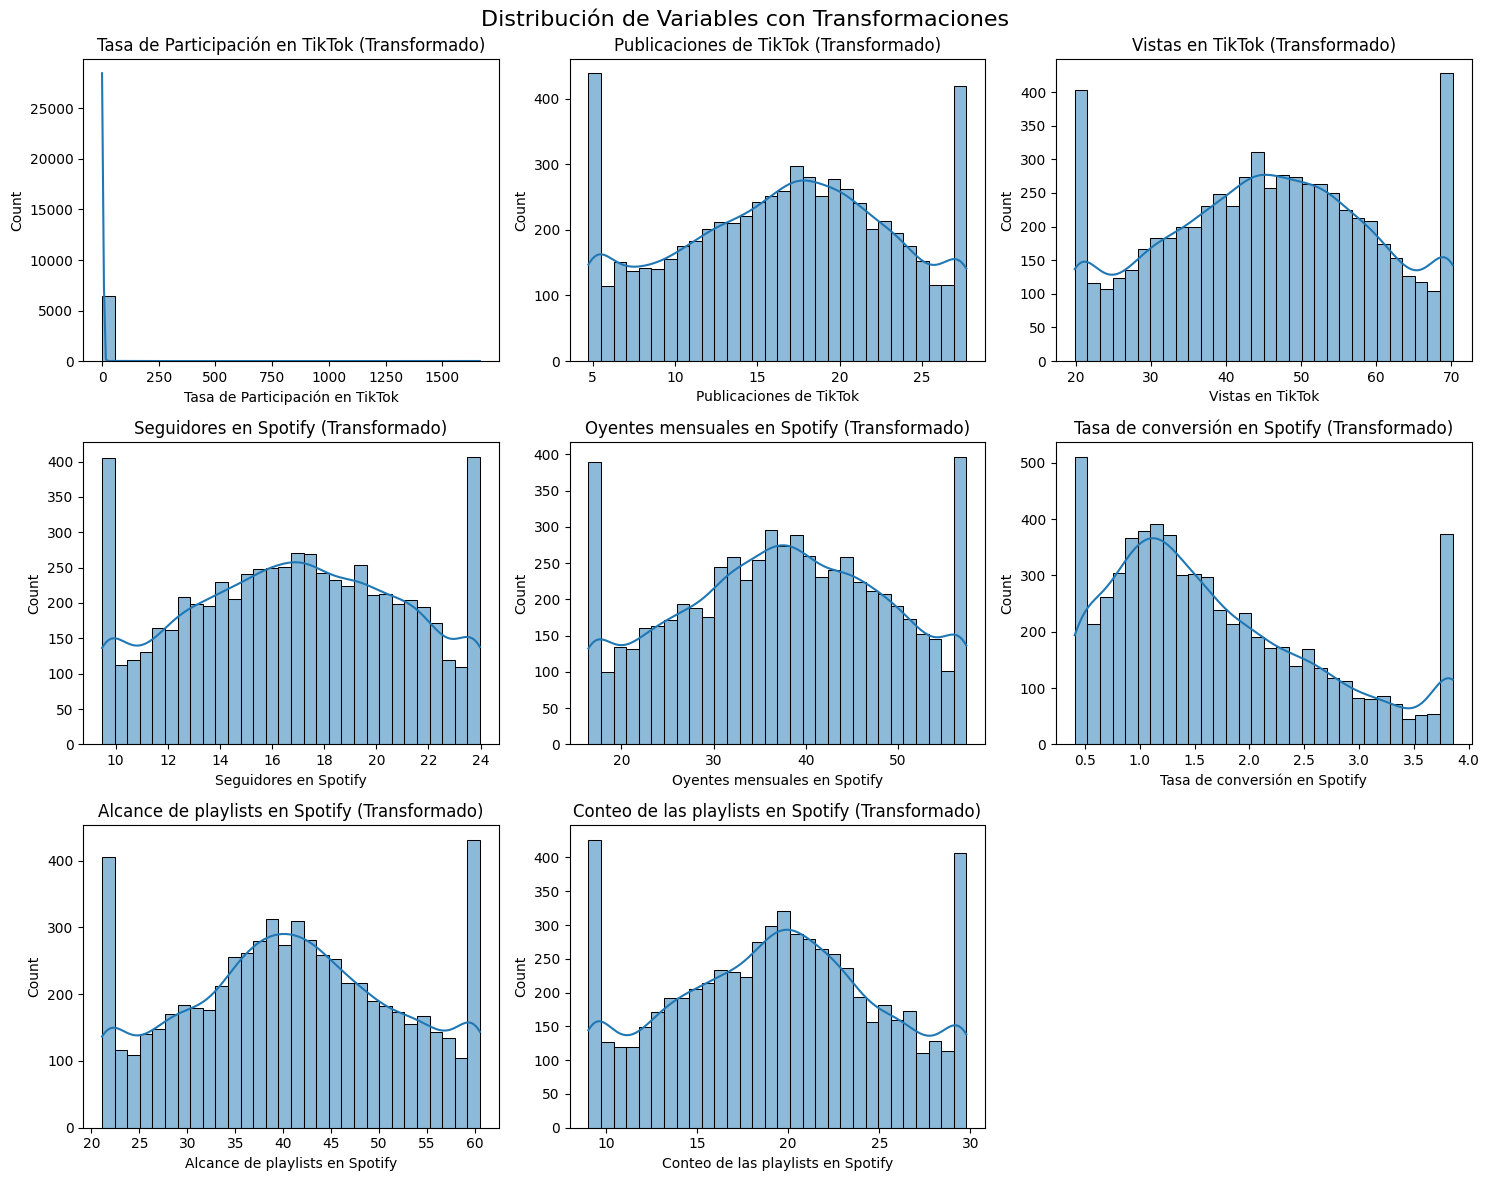

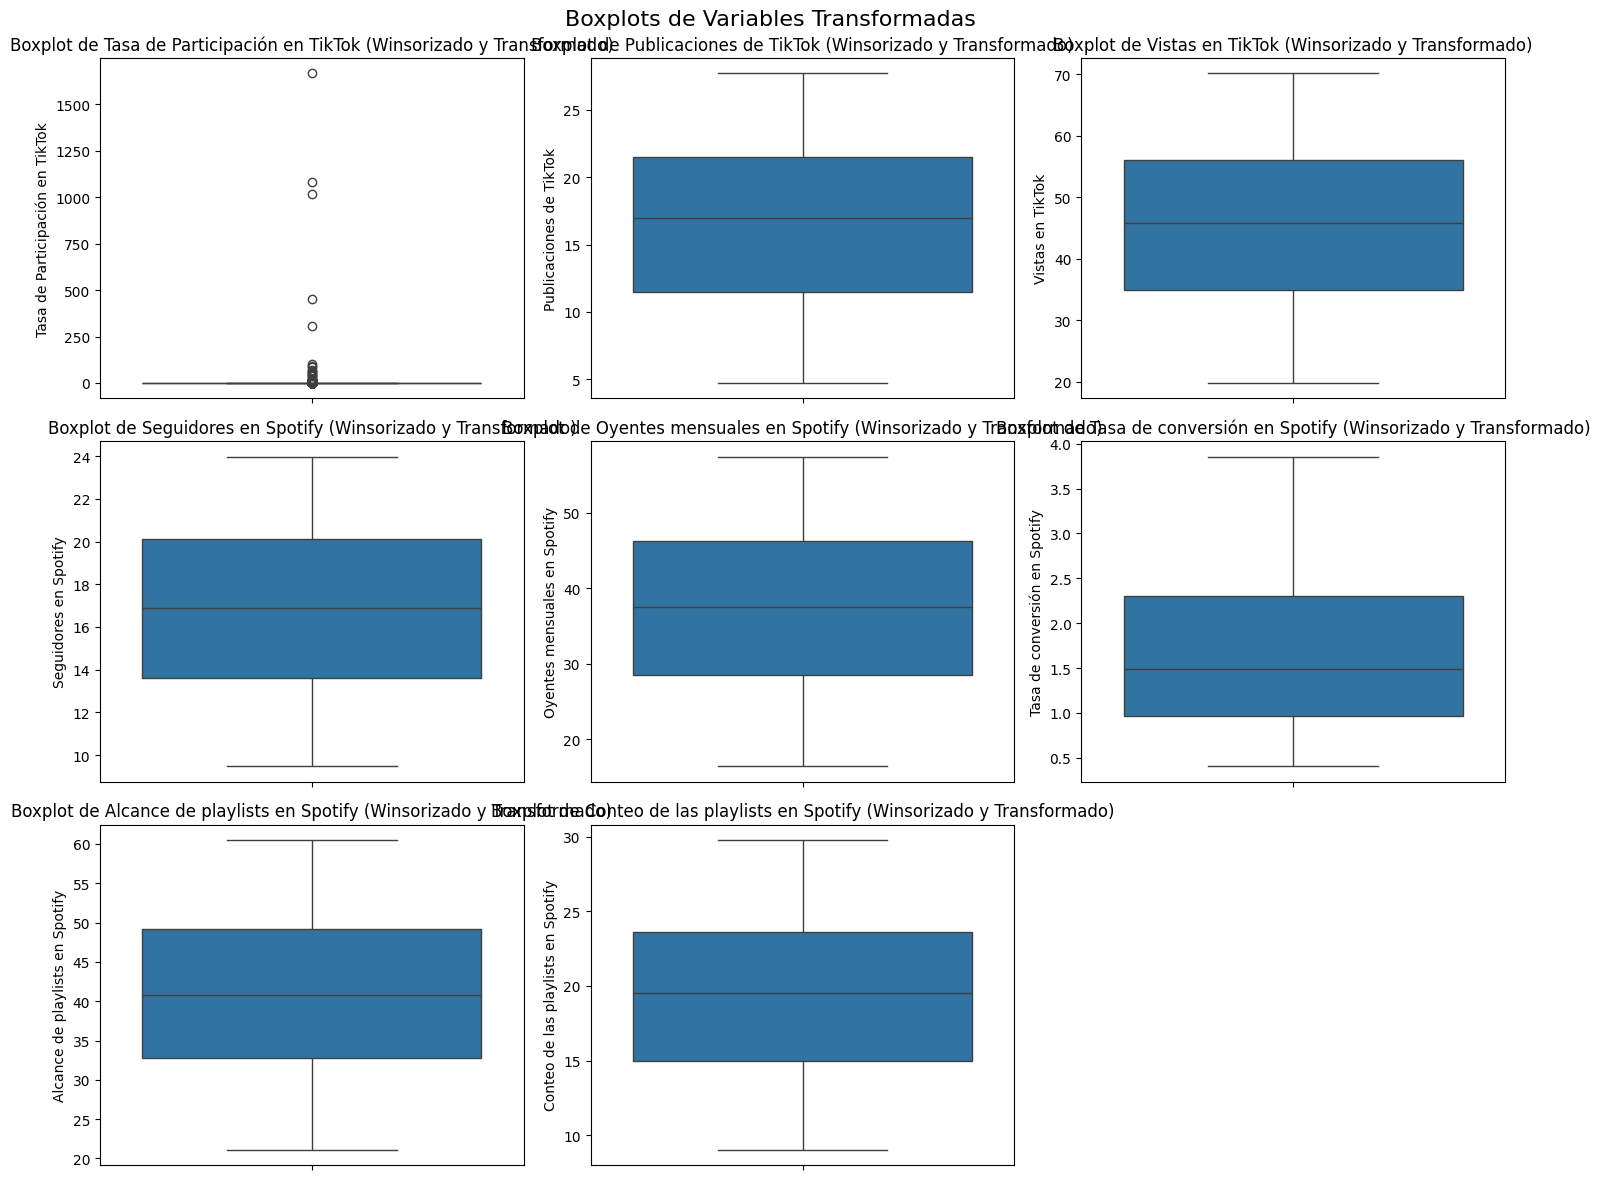

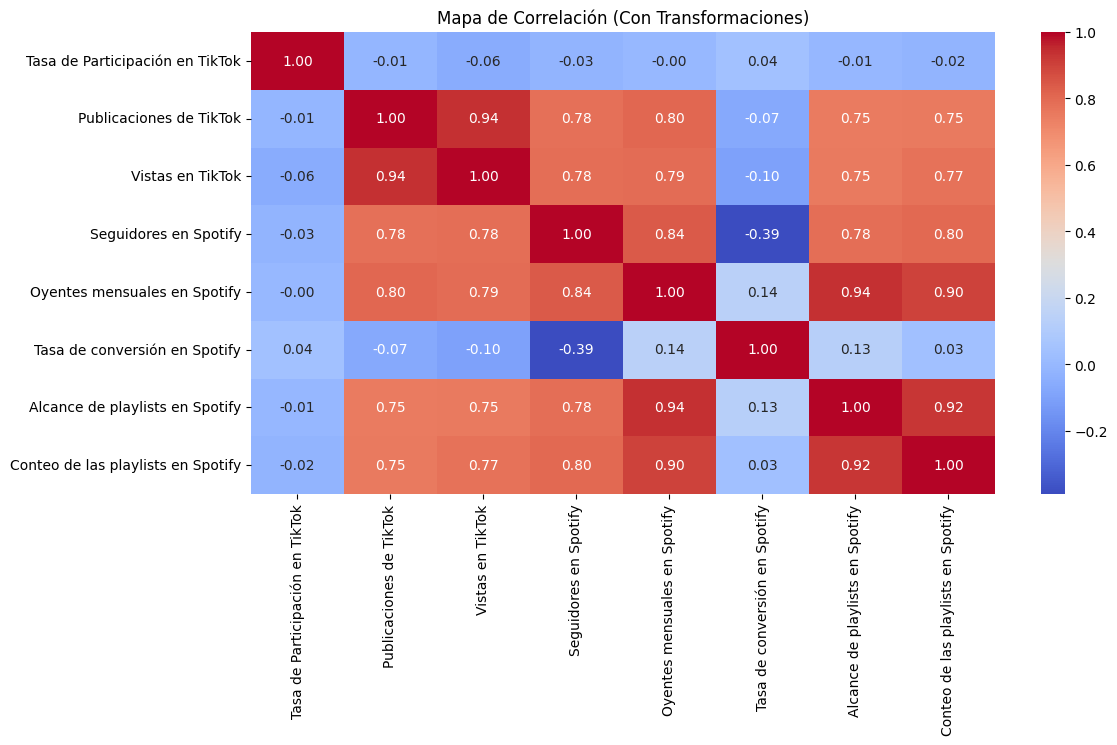

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Análisis avanzado completado. El archivo se ha guardado como 'BASE_DE_DATOS_ARTISTAS_ANALIZADA_CON_TRANSFORMACIONES.xlsx'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import boxcox
from scipy.stats import skew, kurtosis
from scipy.stats.mstats import winsorize
from google.colab import files


uploaded = files.upload()
df_filename = list(uploaded.keys())[0]


df = pd.read_excel(df_filename)


def medidas_estadisticas(df, variables):

    print("\n📊 Medidas de tendencia central y dispersión:")
    print(df[variables].describe())


    print("\n📉 Asimetría y Curtosis:")
    for col in variables:
        print(f"{col}: Asimetría = {skew(df[col]):.4f}, Curtosis = {kurtosis(df[col]):.4f}")


    print("\n🔗 Correlaciones entre variables:")
    print(df[variables].corr())


variables_a_transformar = [
    "Publicaciones de TikTok", "Vistas en TikTok", "Seguidores en Spotify",
    "Oyentes mensuales en Spotify", "Alcance de playlists en Spotify", "Conteo de las playlists en Spotify",
    "Tasa de conversión en Spotify"
]


medidas_estadisticas(df, variables_a_transformar)



for col in variables_a_transformar:
    if col != "Tasa de conversión en Spotify":
        df[col], _ = boxcox(df[col] + 1)
    else:

        df[col] = np.log1p(df[col])


for col in variables_a_transformar:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])


def graficos_descriptivos(df, numeric_cols):
    num_cols = len(numeric_cols)
    rows = (num_cols // 3) + (num_cols % 3 > 0)
    cols = min(3, num_cols)

    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"{col} (Transformado)")
    plt.suptitle("Distribución de Variables con Transformaciones", fontsize=16)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.boxplot(y=df[col])
        plt.title(f"Boxplot de {col} (Winsorizado y Transformado)")
    plt.suptitle("Boxplots de Variables Transformadas", fontsize=16)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(12, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Mapa de Correlación (Con Transformaciones)")
    plt.show()


numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Chartmetric ID' in numeric_columns:
    numeric_columns.remove('Chartmetric ID')

graficos_descriptivos(df, numeric_columns)



output_path = "/content/BASE_DE_DATOS_ARTISTAS_ANALIZADA_CON_TRANSFORMACIONES.xlsx"
df.to_excel(output_path, index=False)


files.download(output_path)
print("✅ Análisis avanzado completado. El archivo se ha guardado como 'BASE_DE_DATOS_ARTISTAS_ANALIZADA_CON_TRANSFORMACIONES.xlsx'.")


Saving ARTISTAS_LIMPIO (1).xlsx to ARTISTAS_LIMPIO (1) (9).xlsx

📊 Medidas de tendencia central y dispersión:
       Publicaciones de TikTok  Vistas en TikTok  Seguidores en Spotify  \
count             6.443000e+03      6.443000e+03           6.443000e+03   
mean              8.813626e+05      1.516846e+09           1.694521e+06   
std               3.018586e+06      5.466556e+09           5.697762e+06   
min               0.000000e+00      3.200000e+01           4.000000e+00   
25%               4.346000e+03      1.011504e+07           3.407250e+04   
50%               6.417100e+04      1.171726e+08           2.210580e+05   
75%               4.357180e+05      8.023614e+08           1.204821e+06   
max               4.800064e+07      2.197153e+11           1.312953e+08   

       Oyentes mensuales en Spotify  Alcance de playlists en Spotify  \
count                  6.443000e+03                     6.443000e+03   
mean                   4.141856e+06                     3.723669e+07  

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 6443.
  res = hypotest_fun_out(*samples, **kwds)


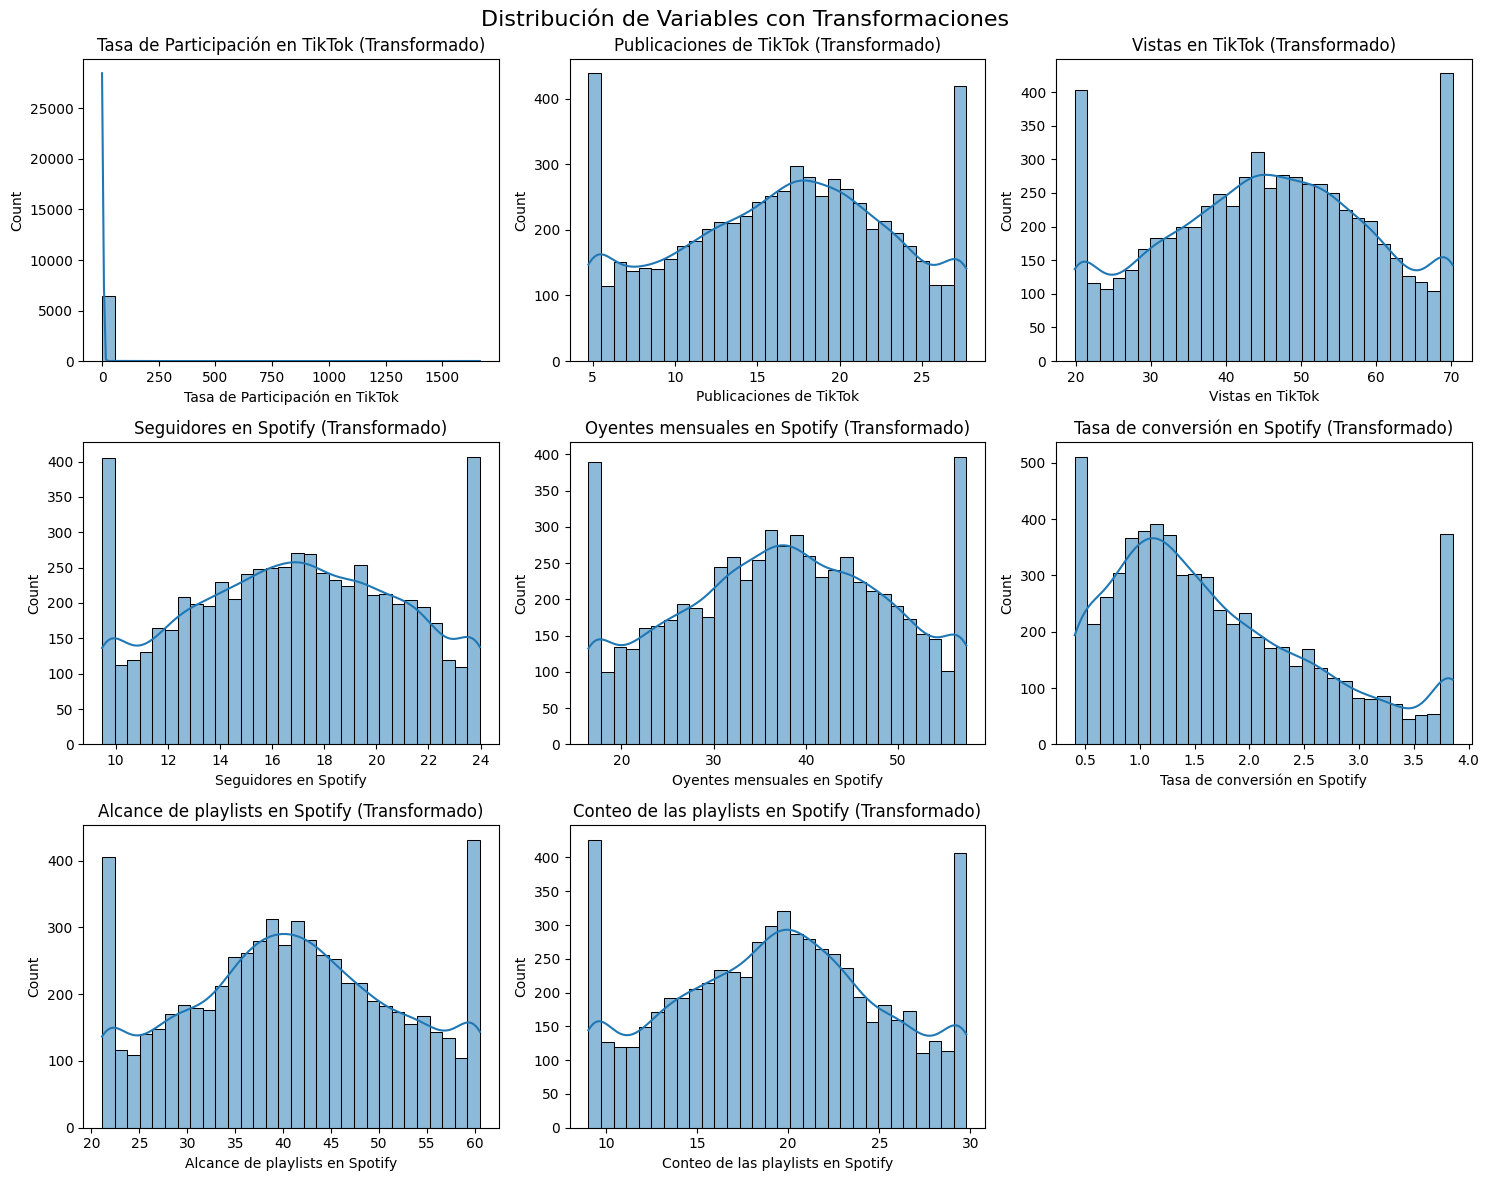

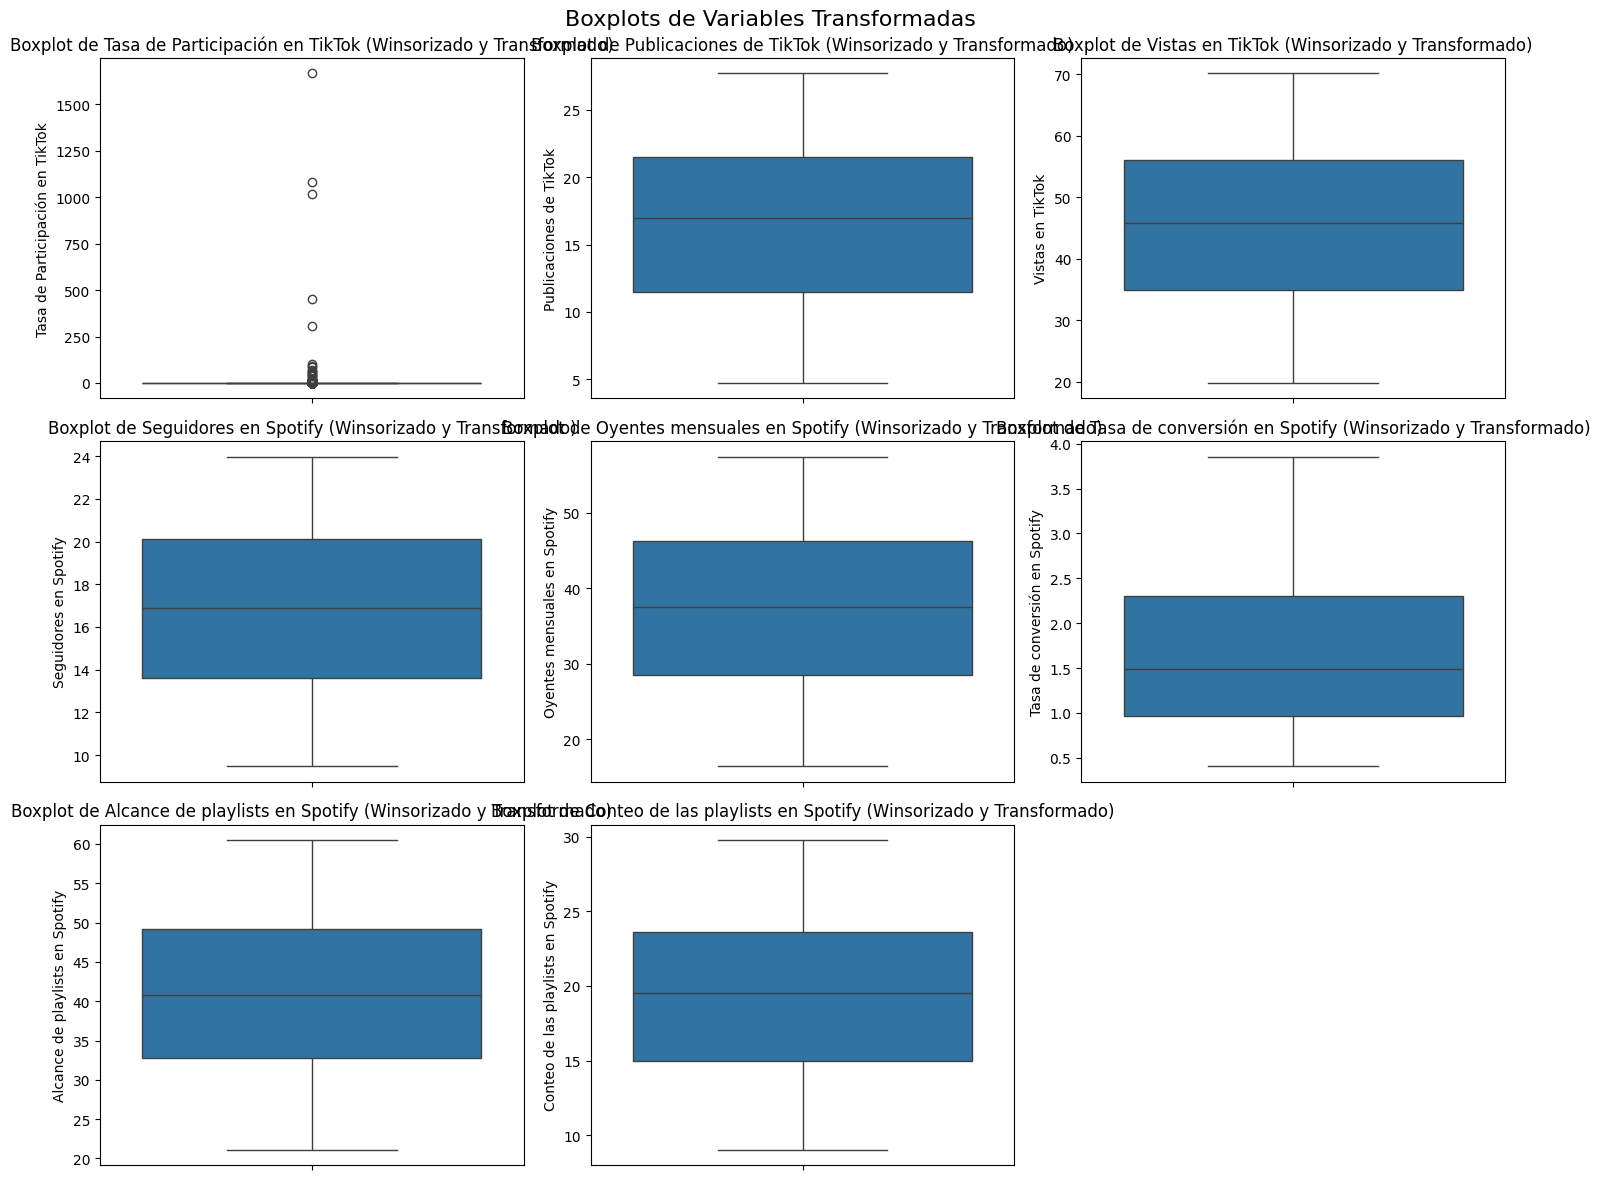

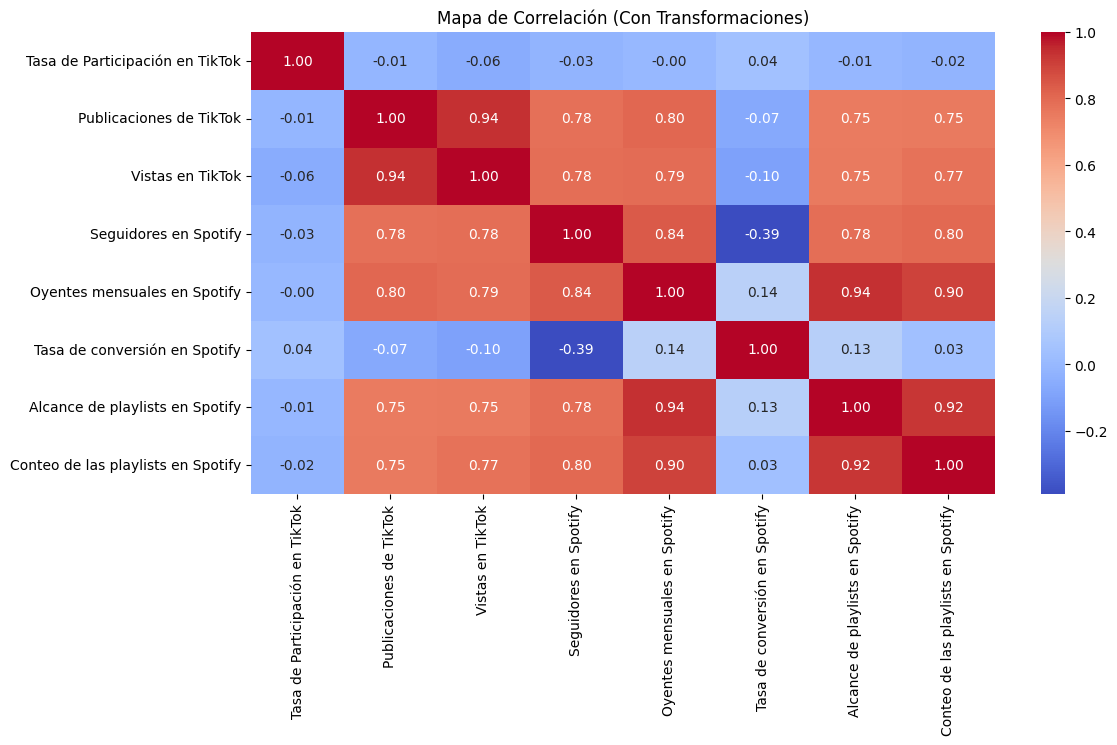

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Análisis avanzado completado. El archivo se ha guardado como 'BASE_DE_DATOS_ARTISTAS_ANALIZADA_MEJORADA.xlsx'.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import boxcox, skew, kurtosis, shapiro
from scipy.stats.mstats import winsorize
from google.colab import files


uploaded = files.upload()
df_filename = list(uploaded.keys())[0]


df = pd.read_excel(df_filename)


def medidas_estadisticas(df, variables):

    print("\n📊 Medidas de tendencia central y dispersión:")
    print(df[variables].describe())


    print("\n📉 Asimetría y Curtosis:")
    for col in variables:
        print(f"{col}: Asimetría = {skew(df[col]):.4f}, Curtosis = {kurtosis(df[col]):.4f}")


    print("\n🔍 Prueba de normalidad (Shapiro-Wilk):")
    for col in variables:
        stat, p_value = shapiro(df[col].dropna())
        print(f"{col}: Estadística = {stat:.4f}, p-valor = {p_value:.4f}")


variables_a_transformar = [
    "Publicaciones de TikTok", "Vistas en TikTok", "Seguidores en Spotify",
    "Oyentes mensuales en Spotify", "Alcance de playlists en Spotify", "Conteo de las playlists en Spotify",
    "Tasa de conversión en Spotify"
]


medidas_estadisticas(df, variables_a_transformar)



for col in variables_a_transformar:
    if col != "Tasa de conversión en Spotify":
        df[col], _ = boxcox(df[col] + 1)
    else:

        df[col] = np.log1p(df[col])


for col in variables_a_transformar:
    df[col] = winsorize(df[col], limits=[0.05, 0.05])


def graficos_descriptivos(df, numeric_cols):
    num_cols = len(numeric_cols)
    rows = (num_cols // 3) + (num_cols % 3 > 0)
    cols = min(3, num_cols)

    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f"{col} (Transformado)")
    plt.suptitle("Distribución de Variables con Transformaciones", fontsize=16)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(5 * cols, 4 * rows))
    for i, col in enumerate(numeric_cols, 1):
        plt.subplot(rows, cols, i)
        sns.boxplot(y=df[col])
        plt.title(f"Boxplot de {col} (Winsorizado y Transformado)")
    plt.suptitle("Boxplots de Variables Transformadas", fontsize=16)
    plt.tight_layout()
    plt.show()


    plt.figure(figsize=(12, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Mapa de Correlación (Con Transformaciones)")
    plt.show()


numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
if 'Chartmetric ID' in numeric_columns:
    numeric_columns.remove('Chartmetric ID')

graficos_descriptivos(df, numeric_columns)



output_path = "/content/BASE_DE_DATOS_ARTISTAS_ANALIZADA_MEJORADA.xlsx"
df.to_excel(output_path, index=False)


files.download(output_path)
print("✅ Análisis avanzado completado. El archivo se ha guardado como 'BASE_DE_DATOS_ARTISTAS_ANALIZADA_MEJORADA.xlsx'.")
